# Sampling S-Protein S-Peptide data

*Author: Björn Harink*  
*Date: 20180228*  
*Set: S-Protein - S-Peptide*  
*Description:* Sampling, down-sampling, up-sampling, using various resampling methods.

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd

# Import the mrbles package
import mrbles

# Regular plot graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
init_notebook_mode(connected=True)

# Additional
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.8.8


## Load MRBLE library information

Load excel file with information about the the MRBLES library. Please use example file.

Main information that needs to in there are the different ratios (e.g. Dy, Sm, Tm). The code number starts from 0 and is based on the row number. Additional code numbers can be given (for instance when using a partial code set), but this not influence the code calling. All additional columns  provided in the classes are added as information, with a `info.` as prefix.

In [3]:
mrbles_library_info = pd.read_excel(r'C:\DATA\Huy\20170309 CN\20170309_SEQ_Full.xlsx')

In [4]:
mrbles_library_info

code          sequence repeat                             info       Dy  \
0      1   AGPHPVIVITGPHEE     1A                               WT  0.00000   
1      2   AGIVPIHVTHAPGEE     2A                        Scrambled  0.00000   
2      3   AGPHPVIVVTGPHEE     3A                               Li  0.00000   
3      4   AGPHPVIVINGPHEE     4A                               Li  0.00000   
4      5   AGPHPVIAVTGPHEE     5A                               Li  0.00000   
5      6   AGPHPAIVITGPHEE     6A                               Li  0.00000   
6      7   AGPHPAIVITGPHEE     6B                               Li  0.00000   
7      8   AGPHPKIVITGPHEE     7A  High binder from initial assays  0.00000   
8      9   AGPHPSIVITGPHEE     8A  High binder from initial assays  0.00000   
9     10   AGPHPVIAVTGPSEE     9A      Benchmark for phosphoserine  0.00000   
10    11   AGPHPVIAVTGPsEE    10A                    Phosphoserine  0.00000   
11    12   AGPHPVIVITGPHEE     1B                               WT  0.00000   
12    13   AGIVPIHVTHAPGEE     2B                              NaN  0.00000   
13    14   AGPHPVIVVTGPHEE     3B                              NaN  0.00000   
14    15   AGPHPVIVINGPHEE     4B                              NaN  0.00000   
15    16   AGPHPVIAVTGPHEE     5B                              NaN  0.00000   
16    17   AGPHPAIVITGPHEE     6C                              NaN  0.00000   
17    18   AGPHPAIVITGPHEE     6D                              NaN  0.08155   
18    19   AGPHPKIVITGPHEE     7B                              NaN  0.08155   
19    20   AGPHPSIVITGPHEE     8B                              NaN  0.08155   
20    21   AGPHPVIAVTGPSEE     9B                              NaN  0.08155   
21    22   AGPHPVIAVTGPsEE    10B                              NaN  0.08155   
22    23   AGPHPVIVITGPHEE     1C                              NaN  0.08155   
23    24   AGIVPIHVTHAPGEE     2C                              NaN  0.08155   
24    25   AGPHPVIVVTGPHEE     3C                              NaN  0.08155   
25    26   AGPHPVIVINGPHEE     4C                              NaN  0.08155   
26    27   AGPHPVIAVTGPHEE     5C                              NaN  0.08155   
27    28   AGPHPAIVITGPHEE     6E                              NaN  0.08155   
28    29   AGPHPVIAVTGPsEE    10C                              NaN  0.08155   
29    30   AGPHPKIVITGPHEE     7C                              NaN  0.08155   
30    31   AGPHPSIVITGPHEE     8C                              NaN  0.20061   
31    32   AGPHPVIAVTGPSEE     9C                              NaN  0.20061   
32    33   AGPHPAIVITGPHEE     6F                              NaN  0.20061   
33    34  PALESPRIEITSCLGL    11A                           NFATc1  0.20061   
34    35  ASGLSPRIEITPSHEL    12A                           NFATc2  0.20061   
35    36  ASGLSPRIEITGSHEL    13A                       NFATc2 P7G  0.20061   
36    37  ATDTTPSVVVHVCESD    14A                            RCAN1  0.20061   
37    38  KRMEPIAIIITDTEIS    15A                           AKAP79  0.20061   
38    39  PALESPRIEITSCLGL    11B                              NaN  0.20061   
39    40  ASGLSPRIEITPSHEL    12B                              NaN  0.37445   
40    41  ASGLSPRIEITGSHEL    13B                              NaN  0.37445   
41    42  ATDTTPSVVVHVCESD    14B                              NaN  0.37445   
42    43  KRMEPIAIIITDTEIS    15B                              NaN  0.37445   
43    44  PALESPRIEITSCLGL    11C                              NaN  0.37445   
44    45  ASGLSPRIEITPSHEL    12C                              NaN  0.62826   
45    46  ASGLSPRIEITGSHEL    13C                              NaN  0.62826   
46    47  ATDTTPSVVVHVCESD    14C                              NaN  0.62826   
47    48  KRMEPIAIIITDTEIS    15C                              NaN  0.99882   

         Sm       Tm  
0   0.00000  0.00000  
1   0.00000  0.08449  
2   0.00000  0.28960  
3   0.00000  0.78752  
4   0.10822  0.00

## Load images

In [5]:
image_folders = {"50 nM" : r"C:\DATA\Huy\20170309 CN",
                 "100 nM" : r"C:\DATA\Huy\20170309 CN",
                 "250 nM" : r"C:\DATA\Huy\20170309 CN",
                 "125 nM" : r"C:\DATA\Huy\20170309 CN",
                 "500 nM" : r"C:\DATA\Huy\20170309 CN",
                 "1000 nM" : r"C:\DATA\Huy\20170309 CN",
                 "Biotin" :  r"C:\DATA\Huy\20170309 CN"
}

image_patterns = {"50 nM" : r"20170309_CN_HQN106_PAP_50nM800ms_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif",
                  "100 nM" : r"20170309_CN_HQN106_PAP_100nM800ms_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : r"20170309_CN_HQN106_PAP_250nM800msb_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20170309_CN_HQN106_PAP_500nM800msb_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20170309_CN_HQN106_PAP_1uM800ms_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20170307_CN_HQN106_PAP_bio_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 19 files in 50 nM
Found 23 files in 100 nM
Found 20 files in 250 nM
Found 18 files in 500 nM
Found 20 files in 1000 nM
Found 15 files in Biotin


In [6]:
mrbles_images.load()

Renaming channels to make them all the same.

Check channel names by selecting one of the image sets and add `.c`

In [7]:
mrbles_images.data['1000 nM'].c

<xarray.DataArray 'c' (c: 11)>
array(['Cy5', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572',
       'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...

Cropping image to save memory. If possible. If using circle_size then circle must be visible in picture completely.

In [8]:
#mrbles_images.crop_x = slice(90, 940)
#mrbles_images.crop_y = slice(110, 960)

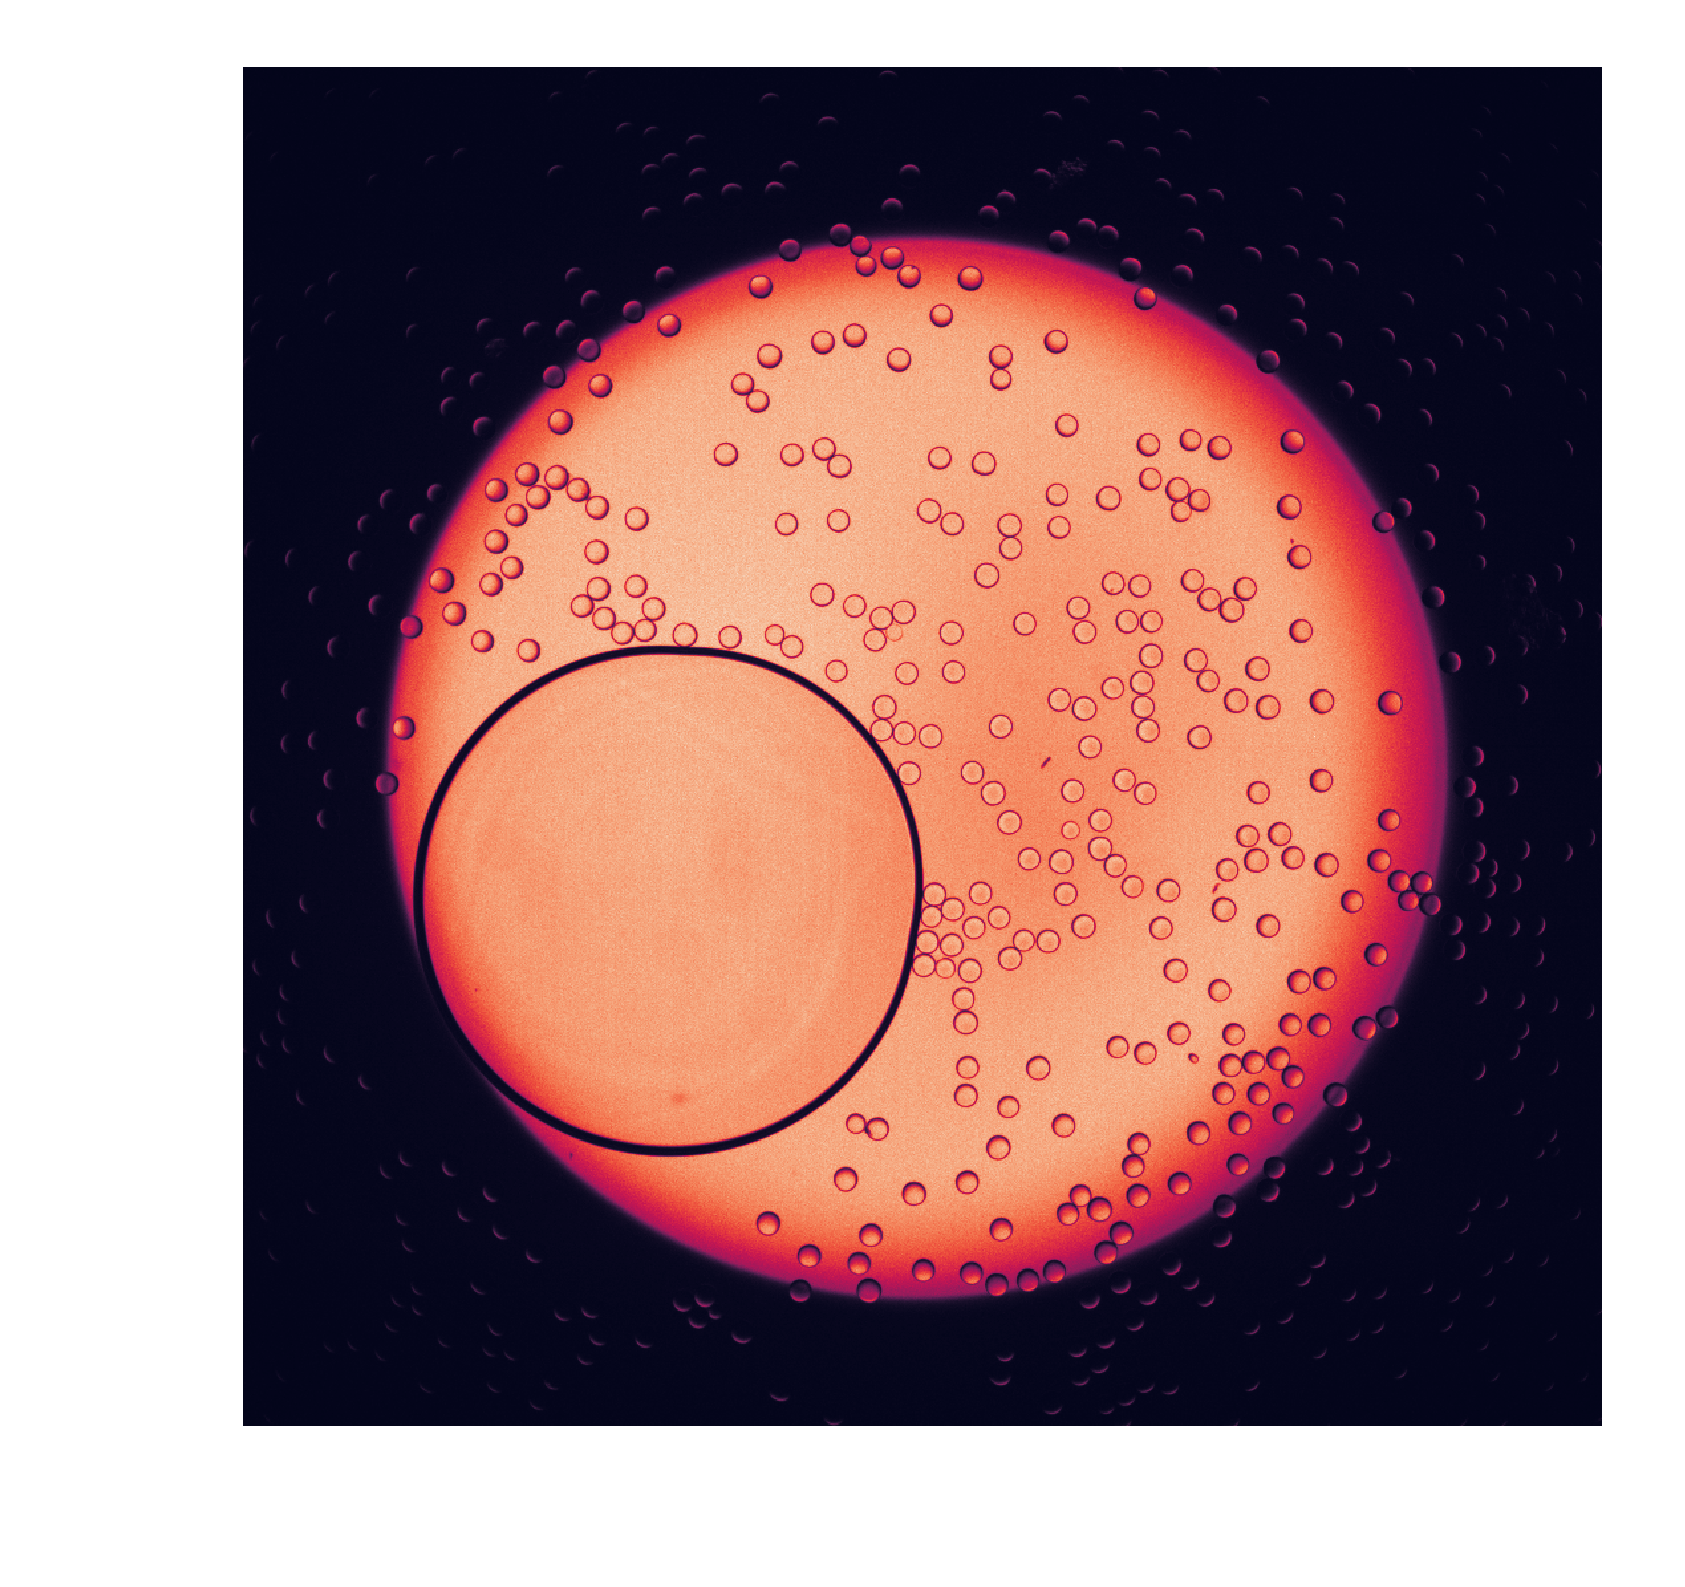

In [9]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['1000 nM', 1, 'Brightfield']);

In [10]:
fig.savefig('brightfield', dpi=450)

## Find MRBLEs

Only use `find_mrbles.settings.parallelize = True` on workstations with multiple CPU cores (>4), otherwise there is no performance gain. It also uses way more memory since it has spawn multiple Python instances.

In [11]:
find_mrbles = mrbles.Find(bead_size=18, border_clear=True, circle_size=350)
find_mrbles.settings.parallelize = True

`find_mrbles.settings` is for internal settings. They all have a default setting, which should work in most cases. If necessary this can be tuned, however. Use `find_mrbles.settings` and then TAB to see a list of options.

Adaptive threshold imaging settings:  
`find_mrbles.settings.thr_block`: The scanning block size.  
`find_mrbles.settings.thr_c`: The leniency.  
Please see link for infomation: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html  
Use `find_mrbles.settings.img2bin()` for parameter testing. 

Filtering settings (default values are based on parameter `bead_size`):  
`find_mrbles.settings.area_min`: Minimum area. Default: area x 0.5.  
`find_mrbles.settings.area_max`: Maximum area. Default: area x 1.5.  
`find_mrbles.settings.eccen_max`: Maximum eccentricity (0 being most circle, 1 being least circle). Default: 0.65.

These attributes can be read by calling:  
`find_mrbles.settings.area_min` 

In [12]:
find_mrbles.settings.area_min

63.61725123519331

These attributes can be set by calling:  
`find_mrbles.settings.area_min = 60` 

In [13]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Bead radius AVG: 18.09
Bead radius SD: 0.35
Bead radius CV: 1.95%
Total number of beads: 12307


You can save bead dimensions here if you want, or plug them in extract step.

In [14]:
#find_mrbles.bead_dims.to_csv('bead-dims.csv')

Bead radius histogram. Chosen bead_size=18 (2xRadius) is good.

(0, 0.8034752699816489)

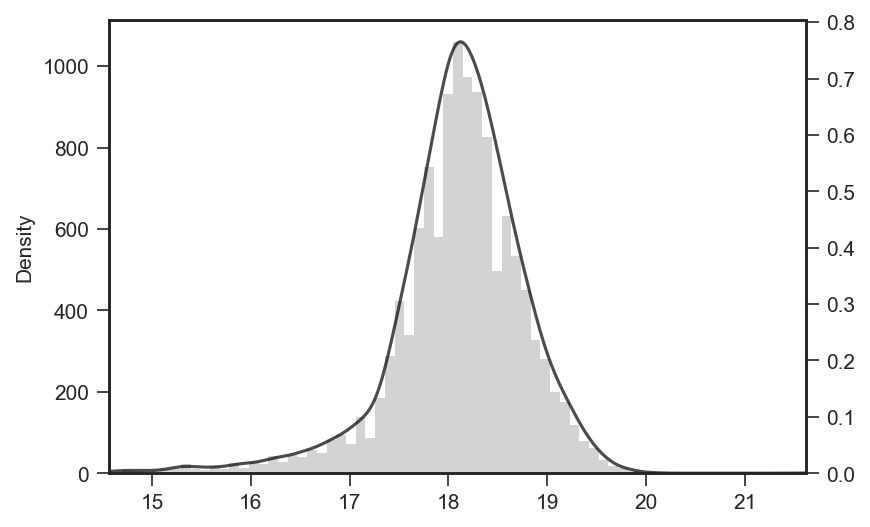

In [32]:
find_mrbles.bead_dims['diameter'] = find_mrbles.bead_dims.radius *2

fig = plt.figure(dpi=150)
b_std = find_mrbles.bead_dims.diameter.std()
b_mean = find_mrbles.bead_dims.diameter.mean()
x_left = b_mean - (5*b_std)
x_right = b_mean + (5*b_std)
ax = find_mrbles.bead_dims.diameter.plot(kind='hist', bins=100, color='lightgray').set_xlim(left=x_left, right=x_right)
find_mrbles.bead_dims.diameter.plot(kind='kde', secondary_y=True, color='black', alpha=0.7).set_ylim(bottom=0)

You can save image here.

In [33]:
# fig.savefig('bead-dist.png', dpi=300)

Check channel names by selecting a set and then add .c

In [21]:
find_mrbles['1000 nM'].c

<xarray.DataArray 'c' (c: 6)>
array(['mask_full', 'mask_ring', 'mask_inside', 'mask_outside', 'mask_bkg',
       'mask_check'], dtype='<U12')
Coordinates:
  * c        (c) <U12 'mask_full' 'mask_ring' 'mask_inside' 'mask_outside' ...

Check multiple files if beads are found properly. Crosses are only properly visible at high DPI, since they are only 1 pixel wide.

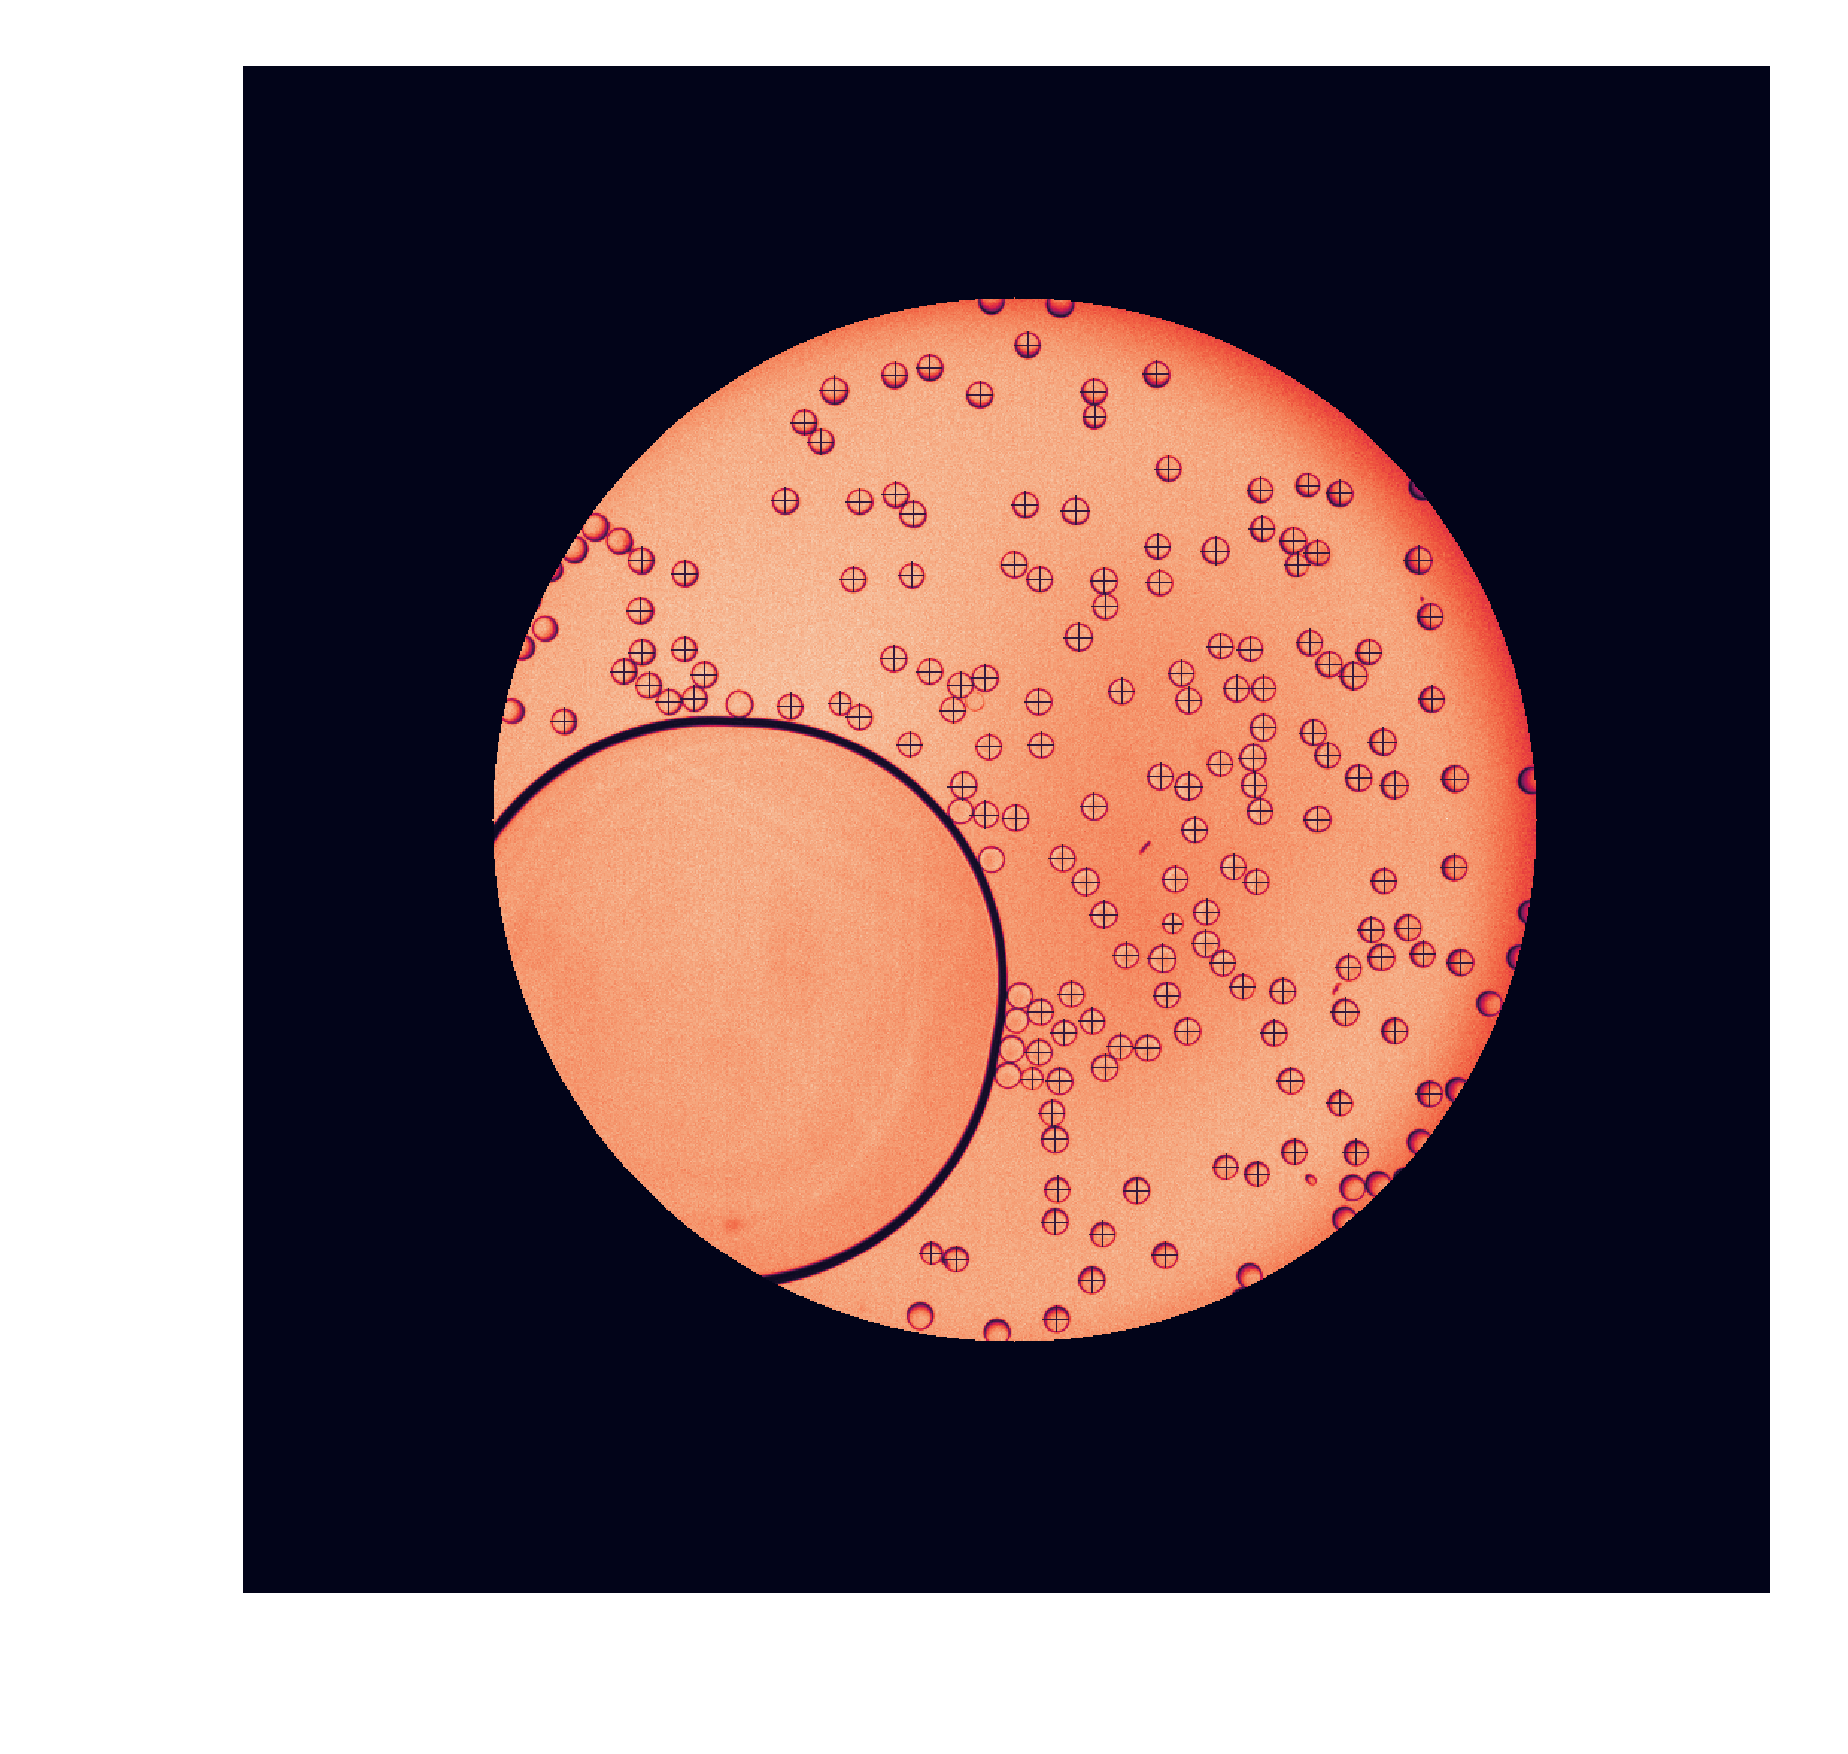

In [15]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['1000 nM', 1, 'mask_check']);

In [16]:
# fig.savefig('mask_check.png', dpi=600)

## Create reference spectra

Load all references and add background `bkg` image from the data-set to be invastigated. Choose region where there are no beads

In [24]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
REF_DECODE_CHANNELS = slice('435','780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\Old refs\Dy_solo_20160915_3",
    "Sm": r"C:\DATA\Old refs\Sm_solo_20160915_1",
    "Tm": r"C:\DATA\Old refs\Tm_1_2_solo_20160915_4",
    "Eu": r"C:\DATA\Old refs\Eu_solo_20160915_3",
    "bkg": r"C:\DATA\Huy\20170309 CN"
}
REF_FILES = {"Dy" : r"Dy_solo_20160915_3_MMStack_Pos0.ome.tif",
             "Sm" : r"Sm_solo_20160915_1_MMStack_Pos0.ome.tif",
             "Tm" : r"Tm_1_2_solo_20160915_4_MMStack_Pos0.ome.tif",
             "Eu" : r"Eu_solo_20160915_3_MMStack_Pos0.ome.tif",
             "bkg" : r"20170309_CN_HQN106_PAP_1uM800ms_1_MMStack_Pos0.ome.tif"  # This must change for your data-set!
}

Set crop value, since there is no circular ROI finding in this one (not neceassary). Set `bkg_roi`.

In [18]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=32)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
BACK_ROIx = slice(480, 606)
BACK_ROIy = slice(432, 564)
spec_object.bkg_roi = [BACK_ROIy, BACK_ROIx, slice('l-435','l-780')]

Found 1 files in Dy
Found 1 files in Sm
Found 1 files in Tm
Found 1 files in Eu
Found 1 files in bkg


In [19]:
spec_object.load()

Bead radius AVG: 31.43
Bead radius SD: 0.28
Bead radius CV: 0.90%
Total number of beads: 174


Check spectra and selected `bkg` region.

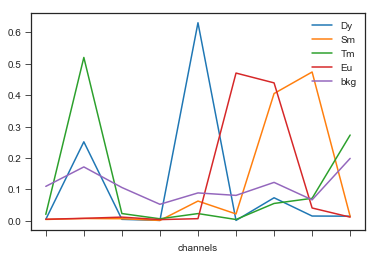

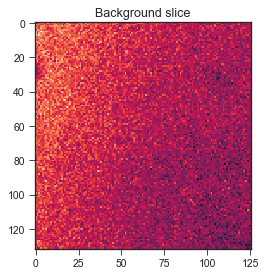

In [20]:
spec_object.plot()

## Spectral unmixing and get ratios

In [25]:
ratio_images = mrbles.Ratio(spec_object)

In [26]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu',  combine_data=mrbles_images[:, :, ['Cy5']])

In [28]:
ratio_images['1000 nM'].c

<xarray.DataArray 'c' (c: 9)>
array(['Cy5', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm', 'Tm_ratio',
       'bkg'], dtype=object)
Coordinates:
  * c        (c) object 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...

Check inmixed images. Checking `Tm` and `bkg` since they share similar peak at 780 nm. If unmixing is not working properly it should show in the images.

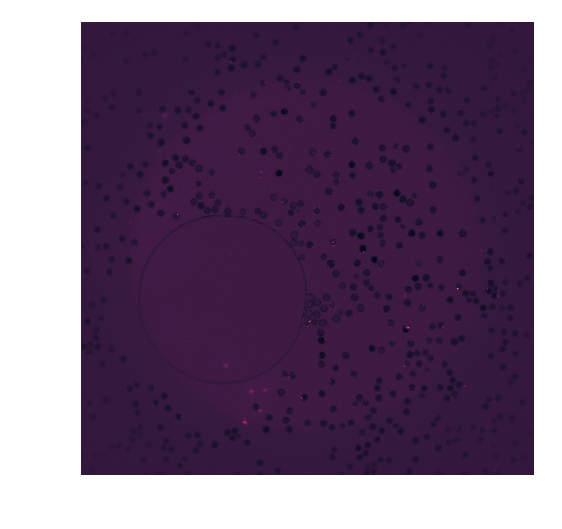

In [33]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['1000 nM', 1, 'bkg']);
fig.savefig('bkg.png', dpi=300)

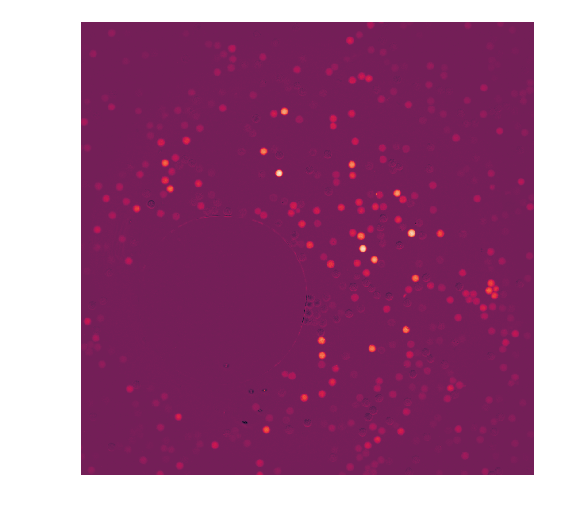

In [36]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['1000 nM', 1, 'Tm']);
fig.savefig('Tm.png', dpi=300)

## Extract data from each MRBLE

This is the step to use the masks from bead finding and select all channels you want the intensities to be extracted using and select which masks.

In [37]:
extract_data = mrbles.Extract()

Select ratio images (for decoding), `Eu` and `bkg` (for filtering), and assay channels (e.g. Cy5). combine_data with bead dimensions.

In [38]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
                 combine_data=find_mrbles.bead_dims)

If only one set, make sure the combined data matches! It is always possible to check. Make sure `label`  and, for instance `Tm_ratio.mask_lbl`,  are the same number in the eventual data!

In [87]:
# extract_data.get(ratio_images['7', :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
#                  find_mrbles['7', :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
#                  combine_data=find_mrbles.bead_dims[find_mrbles.bead_dims.set=='7'])

If there is at least Eu and an bkg image you can do additional filtering to make sure if there are any non-bead objects left from bead finding. This step is defenitely needed for subsequent decoding. Select the mask to be used for filtering. For lanthanide channels this is the inside reference (`Eu.mask_inside`) and for the background this is the outside (`bkg.mask_full`).

In [39]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 12307
Post-filter: 11684
Filtered: 623 (5.1%)


In [40]:
extract_data.data

index     set   f  bead_no  label  x_centroid  y_centroid    radius  \
0          0   50 nM   0        0    3.0  438.669388  250.093878  8.830964   
1          1   50 nM   0        1    4.0  615.712727  544.632727  9.356026   
2          2   50 nM   0        2    5.0  548.984252  547.818898  8.991702   
3          3   50 nM   0        3    6.0  366.687273  589.454545  9.356026   
4          4   50 nM   0        4    7.0  573.958175  698.114068  9.149617   
5          5   50 nM   0        5    8.0  467.585284  706.157191  9.755750   
6          6   50 nM   0        6    9.0  731.539033  745.464684  9.253397   
7          7   50 nM   0        7   10.0  492.714777  760.776632  9.624353   
8          8   50 nM   0        8   11.0  281.643110  764.798587  9.491138   
9          9   50 nM   0        9   12.0  460.461538  775.402098  9.541312   
10        10   50 nM   0       10   13.0  554.996416  839.103943  9.423824   
11        11   50 nM   0       11   14.0  356.731884  844.206522  9.373021   
12        12   50 nM   1        0    4.0  467.857143  221.257937  8.956232   
13        13   50 nM   1        1    5.0  392.224490  225.844898  8.830964   
14        14   50 nM   1        2    6.0  556.118959  232.475836  9.253397   
15        15   50 nM   1        3    7.0  507.802372  238.727273  8.973985   
16        16   50 nM   1        4    8.0  373.091286  254.236515  8.758578   
17        17   50 nM   1        5    9.0  531.935361  256.653992  9.149617   
18        18   50 nM   1        6   10.0  401.937984  260.031008  9.062227   
19        19   50 nM   1        7   11.0  617.537255  259.890196  9.009385   
20        20   50 nM   1        8   12.0  309.772908  262.302789  8.938444   
21        21   50 nM   1        9   13.0  460.736264  263.014652  9.321942   
22        22   50 nM   1       10   14.0  595.285106  262.919149  8.648863   
23        23   50 nM   1       11   15.0  419.249071  263.550186  9.253397   
24        24   50 nM   1       12   16.0  348.473077  276.976923  9.097284   
25        25   50 nM   1       13   18.0  598.974545  280.603636  9.356026   
26        26   50 nM   1       14   19.0  556.674242  283.640152  9.166996   
27        27   50 nM   1       15   20.0  580.303644  283.975709  8.866935   
28        28   50 nM   1       16   21.0  366.421456  288.532567  9.114762   
29        29   50 nM   1       17   22.0  411.921933  290.286245  9.253397   
...      ...     ...  ..      ...    ...         ...         ...       ...   
12276  12276  Biotin  14      179  192.0  600.797794  717.294118  9.304853   
12277  12277  Biotin  14      180  193.0  788.061538  719.550000  9.097284   
12278  12278  Biotin  14      181  194.0  262.841727  720.111511  9.406920   
12279  12279  Biotin  14      182  195.0  543.628788  720.348485  9.166996   
12280  12280  Biotin  14      183  196.0  769.726236  728.026616  9.149617   
12281  12281  Biotin  14      184  197.0  560.837736  737.520755  9.184341   
12282  12282  Biotin  14      185  199.0  586.289474  741.650376  9.201654   
12283  12283  Biotin  14      186  200.0  287.727626  741.797665  9.044647   
12284  12284  Biotin  14      187  201.0  258.796429  744.457143  9.440697   
12285  12285  Biotin  14      188  202.0  238.604563  746.311787  9.149617   
12286  12286  Biotin  14      189  203.0  658.014652  746.450549  9.321942   
12287  12287  Biotin  14      190  204.0  310.726950  747.003546  9.474354   
12288  12288  Biotin  14      191  205.0  413.637631  754.432056  9.557978   
12289  12289  Biotin  14      192  206.0  476.235772  756.882114  8.848968   
12290  12290  Biotin  14      193  207.0  494.888000  756.140000  8.920621   
12291  12291  Biotin  14      194  208.0  349.787072  758.403042  9.149617   
12292  12292  Biotin  14      195  209.0  705.179916  764.472803  8.722159   
12294  12294  Biotin  14      197  211.0  429.696629  788.468165  9.218934   
12295  12295  Biotin  14      198  212.0  330.254826  789.308880  9.079772   
12296  12296  Biotin  14     

If you are only interested in the values and not the codes, you can save it and/or use it for subsequent analaysis. In that case you can also reduce the number of channels in the line above.

In [41]:
# extract_data.data.to_csv(r"20180308 - Triplicate - Extract.csv")

## Decoding

Set up the decode part of the pipeline. Give it the targets as first parameter (only the targets!), and optionally the additional MRBLEs library information.

In [43]:
mrbles_decode = mrbles.Decode(mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']], seq_list=mrbles_library_info)
mrbles_decode.settings.icp._train = False

Combine the data into the `mrbles.Decode` object by accessing `extract_data.data` which holds the data frame.  
Make sure the order of target ratios (above) is the same order as the input (below).

Now run decoding. 

In [44]:
mrbles_decode.decode(extract_data.data.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], 
                     combine_data=extract_data.data)

Delta:  0.1420116865923336
Delta:  0.024311961869135697
Delta:  0.0491573442327071
Delta:  0.0015204680891943696
Delta:  8.246916092899262e-05
Converged after: 5
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.5878127508457182
AIC: 830133.3185803929
BIC: 833661.620923213


Show data and plot data.

In [45]:
mrbles_decode.data

index     set   f  bead_no  label  x_centroid  y_centroid    radius  \
0          0   50 nM   0        0    3.0  438.669388  250.093878  8.830964   
1          1   50 nM   0        1    4.0  615.712727  544.632727  9.356026   
2          2   50 nM   0        2    5.0  548.984252  547.818898  8.991702   
3          3   50 nM   0        3    6.0  366.687273  589.454545  9.356026   
4          4   50 nM   0        4    7.0  573.958175  698.114068  9.149617   
5          5   50 nM   0        5    8.0  467.585284  706.157191  9.755750   
6          6   50 nM   0        6    9.0  731.539033  745.464684  9.253397   
7          7   50 nM   0        7   10.0  492.714777  760.776632  9.624353   
8          8   50 nM   0        8   11.0  281.643110  764.798587  9.491138   
9          9   50 nM   0        9   12.0  460.461538  775.402098  9.541312   
10        10   50 nM   0       10   13.0  554.996416  839.103943  9.423824   
11        11   50 nM   0       11   14.0  356.731884  844.206522  9.373021   
12        12   50 nM   1        0    4.0  467.857143  221.257937  8.956232   
13        13   50 nM   1        1    5.0  392.224490  225.844898  8.830964   
14        14   50 nM   1        2    6.0  556.118959  232.475836  9.253397   
15        15   50 nM   1        3    7.0  507.802372  238.727273  8.973985   
16        16   50 nM   1        4    8.0  373.091286  254.236515  8.758578   
17        17   50 nM   1        5    9.0  531.935361  256.653992  9.149617   
18        18   50 nM   1        6   10.0  401.937984  260.031008  9.062227   
19        19   50 nM   1        7   11.0  617.537255  259.890196  9.009385   
20        20   50 nM   1        8   12.0  309.772908  262.302789  8.938444   
21        21   50 nM   1        9   13.0  460.736264  263.014652  9.321942   
22        22   50 nM   1       10   14.0  595.285106  262.919149  8.648863   
23        23   50 nM   1       11   15.0  419.249071  263.550186  9.253397   
24        24   50 nM   1       12   16.0  348.473077  276.976923  9.097284   
25        25   50 nM   1       13   18.0  598.974545  280.603636  9.356026   
26        26   50 nM   1       14   19.0  556.674242  283.640152  9.166996   
27        27   50 nM   1       15   20.0  580.303644  283.975709  8.866935   
28        28   50 nM   1       16   21.0  366.421456  288.532567  9.114762   
29        29   50 nM   1       17   22.0  411.921933  290.286245  9.253397   
...      ...     ...  ..      ...    ...         ...         ...       ...   
12276  12276  Biotin  14      179  192.0  600.797794  717.294118  9.304853   
12277  12277  Biotin  14      180  193.0  788.061538  719.550000  9.097284   
12278  12278  Biotin  14      181  194.0  262.841727  720.111511  9.406920   
12279  12279  Biotin  14      182  195.0  543.628788  720.348485  9.166996   
12280  12280  Biotin  14      183  196.0  769.726236  728.026616  9.149617   
12281  12281  Biotin  14      184  197.0  560.837736  737.520755  9.184341   
12282  12282  Biotin  14      185  199.0  586.289474  741.650376  9.201654   
12283  12283  Biotin  14      186  200.0  287.727626  741.797665  9.044647   
12284  12284  Biotin  14      187  201.0  258.796429  744.457143  9.440697   
12285  12285  Biotin  14      188  202.0  238.604563  746.311787  9.149617   
12286  12286  Biotin  14      189  203.0  658.014652  746.450549  9.321942   
12287  12287  Biotin  14      190  204.0  310.726950  747.003546  9.474354   
12288  12288  Biotin  14      191  205.0  413.637631  754.432056  9.557978   
12289  12289  Biotin  14      192  206.0  476.235772  756.882114  8.848968   
12290  12290  Biotin  14      193  207.0  494.888000  756.140000  8.920621   
12291  12291  Biotin  14      194  208.0  349.787072  758.403042  9.149617   
12292  12292  Biotin  14      195  209.0  705.179916  764.472803  8.722159   
12294  12294  Biotin  14      197  211.0  429.696629  788.468165  9.218934   
12295  12295  Biotin  14      198  212.0  330.254826  789.308880  9.079772   
12296  12296  Biotin  14     

In [46]:
mrbles_decode.data.to_csv('20180308 - Triplicate - Decode.csv')

### Decode troube-shooting

The Delta must converge fairly quickly to 0, and steps usually does not exceed more than 15 steps. If you see many steps going up in Delta that usually means it is over-fitting. Always check the final clustering with a 2/3D plot (See below).

This could have many causes:
* Too many missing clusters (where you using a reduced code-set?)
* Clusters too noisy or too many outliers
* Wrong target file...

Solutions:
* Select only the targets (codes) that are actually in the data.
* Filter more in the Extract data step.
* Well you got that one...

Sometimes it can't find all the codes, this can have many causes as well:
* Actual missing clusters
* The ICP step failed (mis-alignment), which is necessary for proper classification
* Wrong target file...

Solutions:
* Select only the targets (codes) that are actually in the data.
* Filter more in the Extract data step.
* Well you got that one...

So basically it all the depends on the ICP step. If all solutions fail you can always try and train this step by flipping on by setting training to `True`:  `mrbles_decode.settings.icp._train = True`. This way the object you instantiated `mrbles_decode` remembers the ICP transformation matric and uses it when you use command `mrbls_decode.decode()`

Procuderes to try (in order):
* Find a (or several) condition(s) within your data-set to align on by trying out sets one by one.
* Train it on the initial test images you used for check the code set after you made it.
* Train it on another data-set with the same code ratios.

If you found a procedure that correctly found the codes. Apply it to the entire set with the same object `mrbls_decode.decode()`.

# Quality control

Now the fun begins. All the data is step-wise combined, and `Decode` is the last step, which holds all the data. Now we can check the quality of our code calling and assay.

For convenience we rename it to a shorter name:

In [320]:
mrbles_data = mrbles_decode.data

We can check how the data clusters in a fancy 3D fashion with Plotly:

In [321]:
confidence = 0.95

target_ratios = mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']].values
colors = np.multiply(mrbles_data[(mrbles_data.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_ratios)))

bead_ratios_plot = go.Scatter3d(
    name='Bead ratios',
    x=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=mrbles_data.loc[(mrbles_data.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=mrbles_data.loc[(mrbles_data.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios_plot = go.Scatter3d(
    name='Target ratios',
    x=target_ratios[:,0],
    y=target_ratios[:,1],
    z=target_ratios[:,2],
    text=list(range(1, len(target_ratios)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios_plot = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target_ratios)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios_plot, target_ratios_plot, mean_ratios_plot]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

But perhaps more informative. We can plot the initial Dy ratio as a histogram and then plot the 2D clusters of each Dy level.

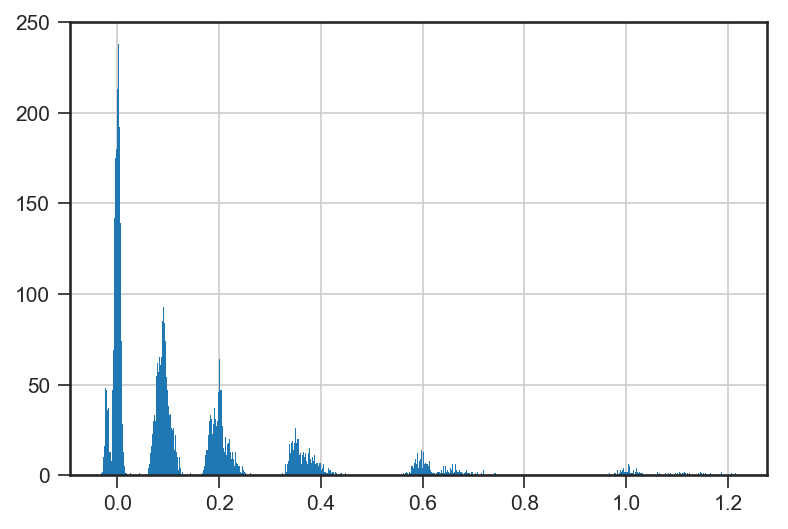

In [44]:
# Pandas
plt.figure(dpi=150)
mrbles_data['Dy_ratio.mask_inside_icp'].hist(bins=1000);

c:\users\bjorn\.virtualenvs\bead_analysis-zay6vl3a\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



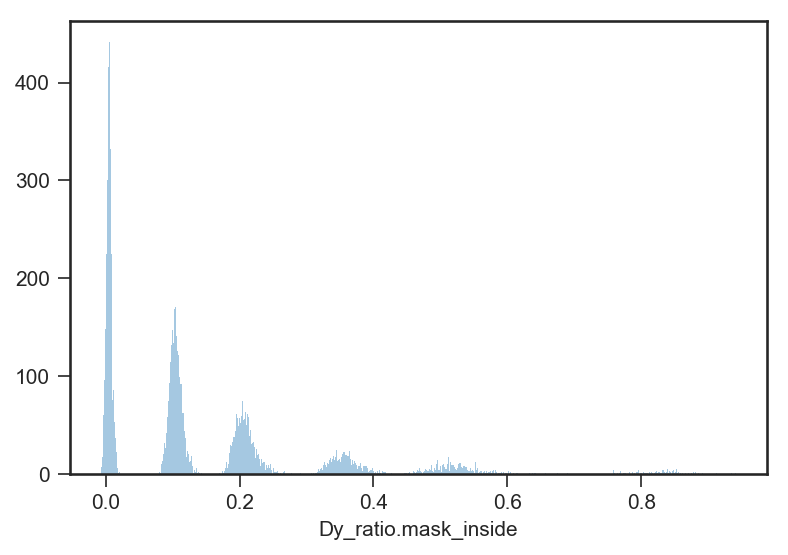

In [50]:
# Seaborn
fig = plt.figure(dpi=150)
sns.distplot(mrbles_data['Dy_ratio.mask_inside'], hist=True, kde=False, bins=1000);
fig.savefig('Dy-Ratio.png')

This shows all the ratios in each Dy level for Tm vs Sm. It is not filtered based on confidence.

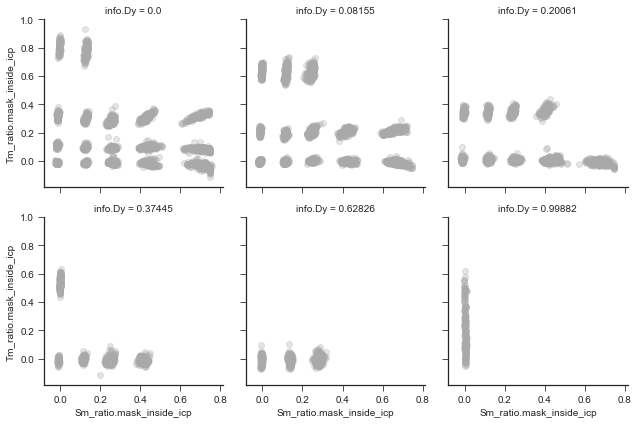

In [53]:
g = sns.FacetGrid(mrbles_data, col="info.Dy", col_wrap=3, sharey=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'});
g.savefig('Per-Dy-Level-SmTm.png', dpi=300)

We can now filter it based on the confidence (or log_prob):

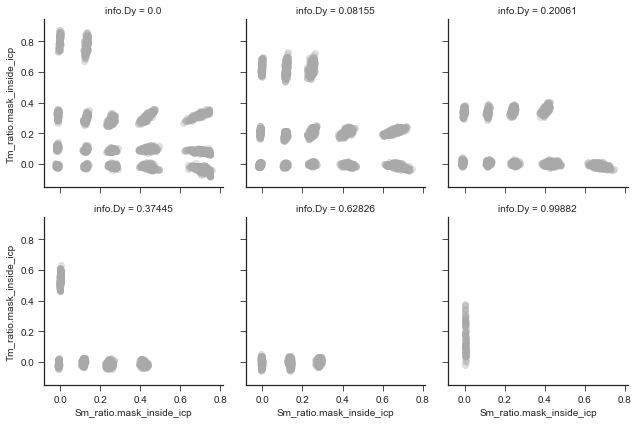

In [54]:
g = sns.FacetGrid(mrbles_data.query('confidence > 0.95'), col="info.Dy", col_wrap=3, sharey=True);
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'});
g.savefig('Per-Dy-Level-SmTm-CI95.png', dpi=300)

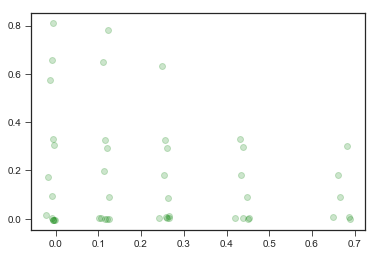

In [157]:
#g = sns.FacetGrid(mrbles_data.query('confidence > 0.95'), col="info.Dy", col_wrap=3, sharey=True);
#g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
#      scatter=True, scatter_kws={'alpha':0.4, 'color':'darkgray'}, line_kws={'color':'black'});
sns.regplot(mrbles_decode.settings.gmm.means[:,1], mrbles_decode.settings.gmm.means[:,2], fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.2, 'color':'green'}, line_kws={'color':'black'});

In [159]:
mrbles_decode.settings.gmm.means.shape

(48, 3)

In [158]:
mrbles_decode.settings.gmm.stds.shape

(48, 3, 3)

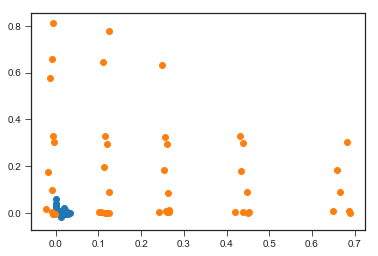

In [153]:
plt.figure()
plt.scatter(x=mrbles_decode.settings.gmm.stds[:,1,1:], y=mrbles_decode.settings.gmm.stds[:,2,1:])
plt.scatter(x=mrbles_decode.settings.gmm.means[:,1], y=mrbles_decode.settings.gmm.means[:,2])

### Cross-contamincation with assay dyes

Likewise we can check how the 'assay' (e.g. Cy5) channel might interfere with code calling. Which would show a trend up|down.

<Figure size 900x600 with 0 Axes>

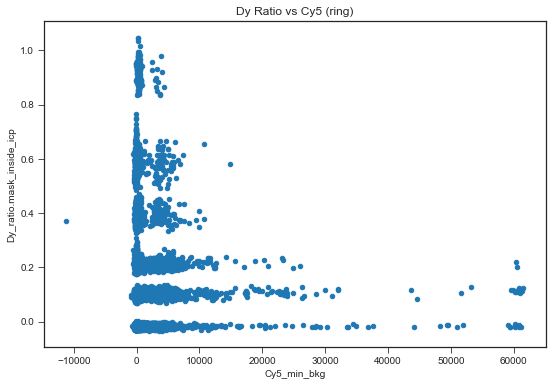

In [230]:
plt.figure(dpi=150);
mrbles_data.plot(kind='scatter', figsize = (9, 6), x='Cy5_min_bkg', y='Dy_ratio.mask_inside_icp', 
                 title='Dy Ratio vs Cy5 (ring)');
plt.savefig('Dy Ratio vs Cy5 (ring) - BKG.png',dpi=300)

<Figure size 900x600 with 0 Axes>

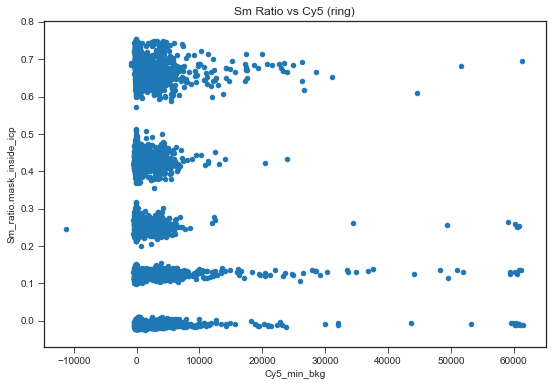

In [231]:
plt.figure(dpi=150);
mrbles_data.plot(kind='scatter', figsize = (9, 6), x='Cy5_min_bkg', y='Sm_ratio.mask_inside_icp', 
                 title='Sm Ratio vs Cy5 (ring)');
plt.savefig('Sm Ratio vs Cy5 (ring) - BKG.png',dpi=300)

<Figure size 1800x1200 with 0 Axes>

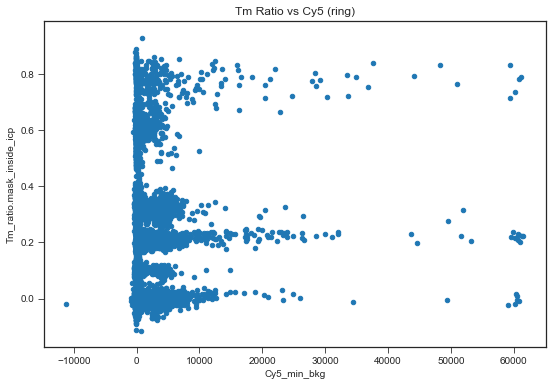

In [232]:
plt.figure(dpi=300);
mrbles_data.plot(kind='scatter', figsize = (9, 6), x='Cy5_min_bkg', y='Tm_ratio.mask_inside_icp', 
                 title='Tm Ratio vs Cy5 (ring)');
plt.savefig('Tm Ratio vs Cy5 (ring) - BKG.png',dpi=300)

In [ ]:
# TODO: Bead number vs Code scatter plot [DONE]
# TODO: Cross-contamination Cy5 vs NPLs/Eu. Should be independent. [Done]
# TODO: Biotin vs code + Histograms
# TODO: SD vs mean for clusters - Gaussian fit - FWHM - Slice or GMM
# TODO: Normalized vs Non-Normalized - In same graph per code
# TODO: Individual fits Un-norm vs Norm for Only high binders. - Rmax histograms. Should look better with normalization.
# TODO: For triplicate for curves agree more or less well with/without normalization.

### Bead number vs Code

In [60]:
mrbles_data

index     set   f  bead_no  label  x_centroid  y_centroid    radius  \
0          0   50 nM   0        0    3.0  438.669388  250.093878  8.830964   
1          1   50 nM   0        1    4.0  615.712727  544.632727  9.356026   
2          2   50 nM   0        2    5.0  548.984252  547.818898  8.991702   
3          3   50 nM   0        3    6.0  366.687273  589.454545  9.356026   
4          4   50 nM   0        4    7.0  573.958175  698.114068  9.149617   
5          5   50 nM   0        5    8.0  467.585284  706.157191  9.755750   
6          6   50 nM   0        6    9.0  731.539033  745.464684  9.253397   
7          7   50 nM   0        7   10.0  492.714777  760.776632  9.624353   
8          8   50 nM   0        8   11.0  281.643110  764.798587  9.491138   
9          9   50 nM   0        9   12.0  460.461538  775.402098  9.541312   
10        10   50 nM   0       10   13.0  554.996416  839.103943  9.423824   
11        11   50 nM   0       11   14.0  356.731884  844.206522  9.373021   
12        12   50 nM   1        0    4.0  467.857143  221.257937  8.956232   
13        13   50 nM   1        1    5.0  392.224490  225.844898  8.830964   
14        14   50 nM   1        2    6.0  556.118959  232.475836  9.253397   
15        15   50 nM   1        3    7.0  507.802372  238.727273  8.973985   
16        16   50 nM   1        4    8.0  373.091286  254.236515  8.758578   
17        17   50 nM   1        5    9.0  531.935361  256.653992  9.149617   
18        18   50 nM   1        6   10.0  401.937984  260.031008  9.062227   
19        19   50 nM   1        7   11.0  617.537255  259.890196  9.009385   
20        20   50 nM   1        8   12.0  309.772908  262.302789  8.938444   
21        21   50 nM   1        9   13.0  460.736264  263.014652  9.321942   
22        22   50 nM   1       10   14.0  595.285106  262.919149  8.648863   
23        23   50 nM   1       11   15.0  419.249071  263.550186  9.253397   
24        24   50 nM   1       12   16.0  348.473077  276.976923  9.097284   
25        25   50 nM   1       13   18.0  598.974545  280.603636  9.356026   
26        26   50 nM   1       14   19.0  556.674242  283.640152  9.166996   
27        27   50 nM   1       15   20.0  580.303644  283.975709  8.866935   
28        28   50 nM   1       16   21.0  366.421456  288.532567  9.114762   
29        29   50 nM   1       17   22.0  411.921933  290.286245  9.253397   
...      ...     ...  ..      ...    ...         ...         ...       ...   
12276  12276  Biotin  14      179  192.0  600.797794  717.294118  9.304853   
12277  12277  Biotin  14      180  193.0  788.061538  719.550000  9.097284   
12278  12278  Biotin  14      181  194.0  262.841727  720.111511  9.406920   
12279  12279  Biotin  14      182  195.0  543.628788  720.348485  9.166996   
12280  12280  Biotin  14      183  196.0  769.726236  728.026616  9.149617   
12281  12281  Biotin  14      184  197.0  560.837736  737.520755  9.184341   
12282  12282  Biotin  14      185  199.0  586.289474  741.650376  9.201654   
12283  12283  Biotin  14      186  200.0  287.727626  741.797665  9.044647   
12284  12284  Biotin  14      187  201.0  258.796429  744.457143  9.440697   
12285  12285  Biotin  14      188  202.0  238.604563  746.311787  9.149617   
12286  12286  Biotin  14      189  203.0  658.014652  746.450549  9.321942   
12287  12287  Biotin  14      190  204.0  310.726950  747.003546  9.474354   
12288  12288  Biotin  14      191  205.0  413.637631  754.432056  9.557978   
12289  12289  Biotin  14      192  206.0  476.235772  756.882114  8.848968   
12290  12290  Biotin  14      193  207.0  494.888000  756.140000  8.920621   
12291  12291  Biotin  14      194  208.0  349.787072  758.403042  9.149617   
12292  12292  Biotin  14      195  209.0  705.179916  764.472803  8.722159   
12294  12294  Biotin  14      197  211.0  429.696629  788.468165  9.218934   
12295  12295  Biotin  14      198  212.0  330.254826  789.308880  9.079772   
12296  12296  Biotin  14     

In [81]:
mrbles_data.groupby(['set']).code.unique()

set
100 nM     [41, 28, 44, 40, 11, 45, 21, 36, 46, 22, 47, 8...
1000 nM    [10, 14, 13, 42, 28, 21, 35, 36, 29, 19, 27, 1...
250 nM     [40, 6, 45, 38, 27, 32, 25, 20, 14, 11, 22, 10...
50 nM      [44, 32, 30, 5, 41, 20, 36, 37, 13, 31, 35, 17...
500 nM     [15, 28, 29, 20, 16, 14, 26, 13, 23, 27, 21, 1...
Biotin     [7, 15, 41, 20, 29, 0, 32, 22, 44, 13, 28, 40,...
Name: code, dtype: object

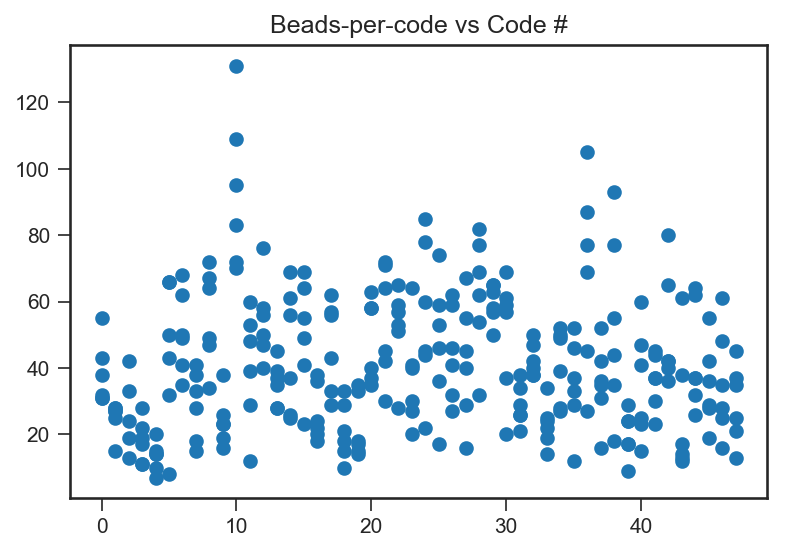

In [84]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.groupby(['set', 'code']).code.unique(), y=mrbles_data.groupby(['set', 'code']).size());
fig.savefig('beads-per-code-per-set-scatter.png', dpi=300)

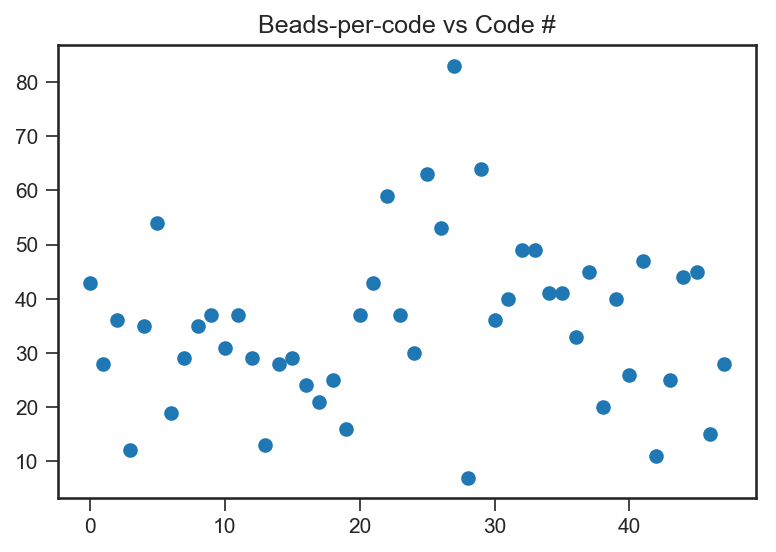

In [73]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='1000 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='1000 nM'].groupby('code').size());
fig.savefig('beads-per-code-1000.png', dpi=300)

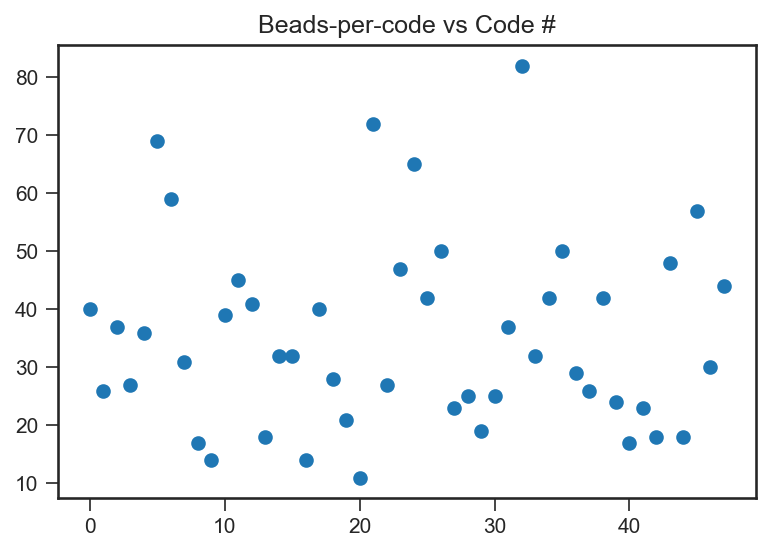

In [75]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='500 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='500 nM'].groupby('code').size());
fig.savefig('beads-per-code-500.png', dpi=300)

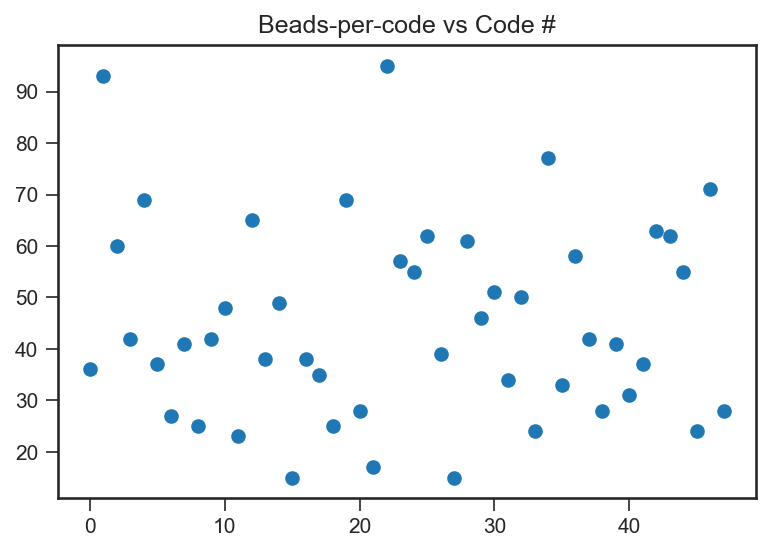

In [87]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='250 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='250 nM'].groupby('code').size());
fig.savefig('beads-per-code-250.png', dpi=300)

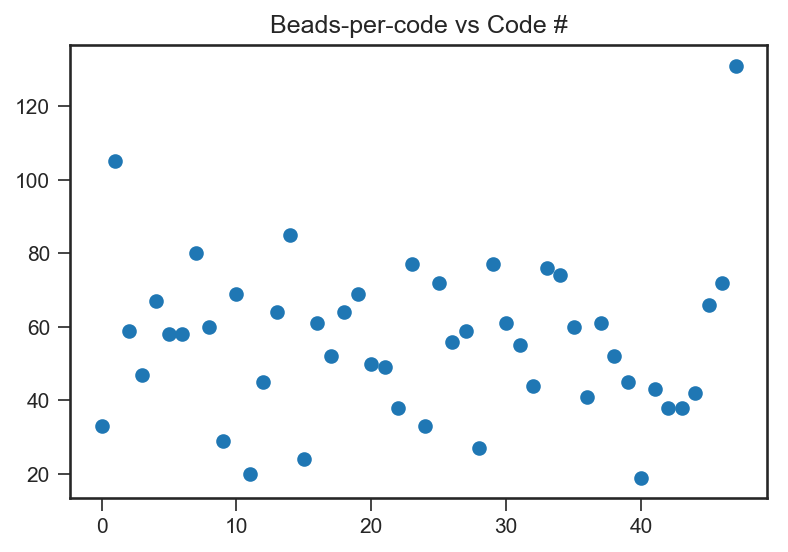

In [88]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='100 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='100 nM'].groupby('code').size());
fig.savefig('beads-per-code-100.png', dpi=300)

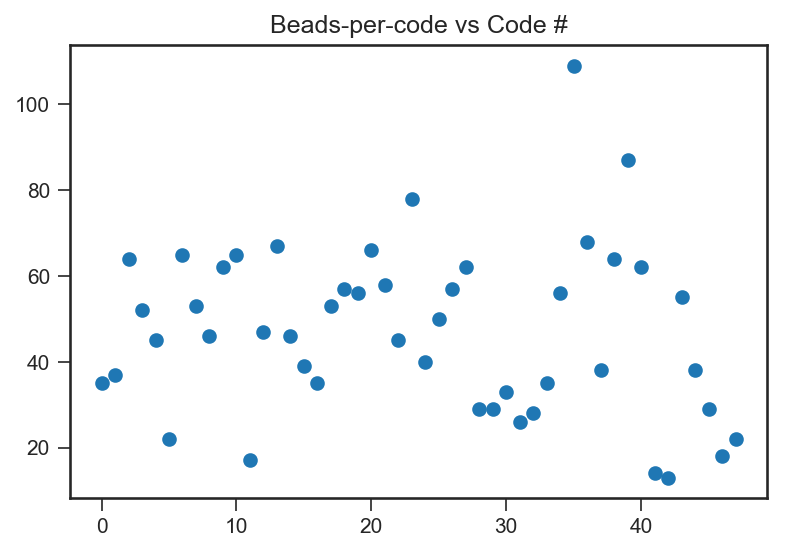

In [89]:
fig = plt.figure(dpi=150);
plt.title('Beads-per-code vs Code #');
plt.scatter(x=mrbles_data.loc[mrbles_data.set=='50 nM'].code.unique(), y=mrbles_data[mrbles_data.set=='50 nM'].groupby('code').size());
fig.savefig('beads-per-code-50.png', dpi=300)

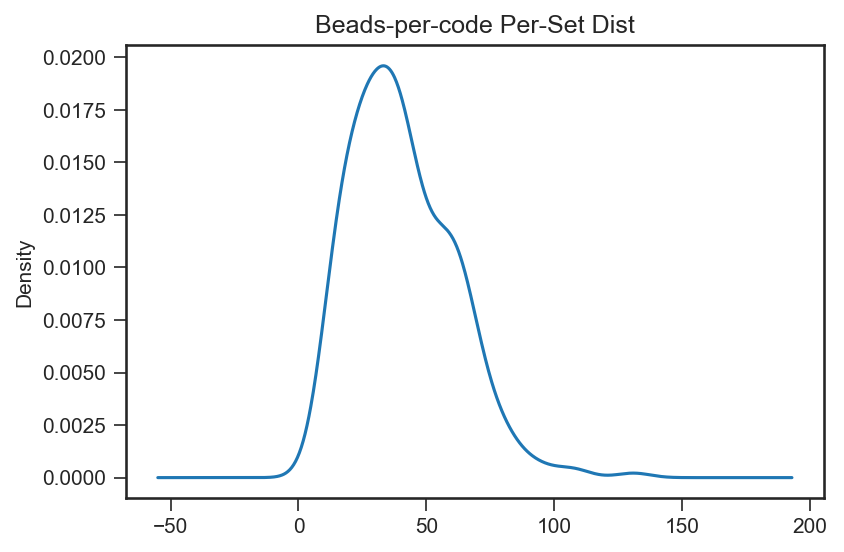

In [77]:
fig = plt.figure(dpi=150);
mrbles_data.groupby(['set','code']).size().plot(kind='kde', title="Beads-per-code Per-Set Dist");
fig.savefig('beads-per-code-per-set-dist.png', dpi=300)

### Biotin vs Code

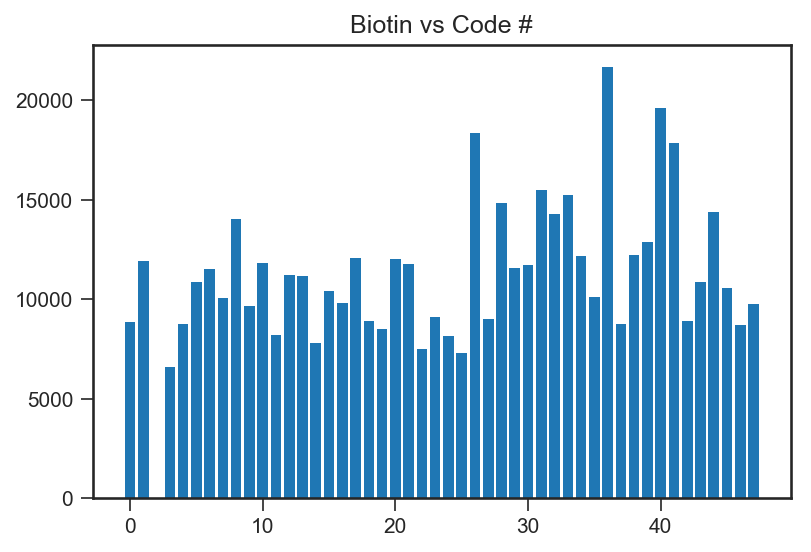

In [95]:
fig = plt.figure(dpi=150);
plt.title('Biotin vs Code #');
plt.bar(mrbles_data.loc[mrbles_data.set=='Biotin', 'code'], mrbles_data.loc[mrbles_data.set=='Biotin', 'Cy5.mask_ring']);
fig.savefig('biotin-vs-code.png', dpi=300)

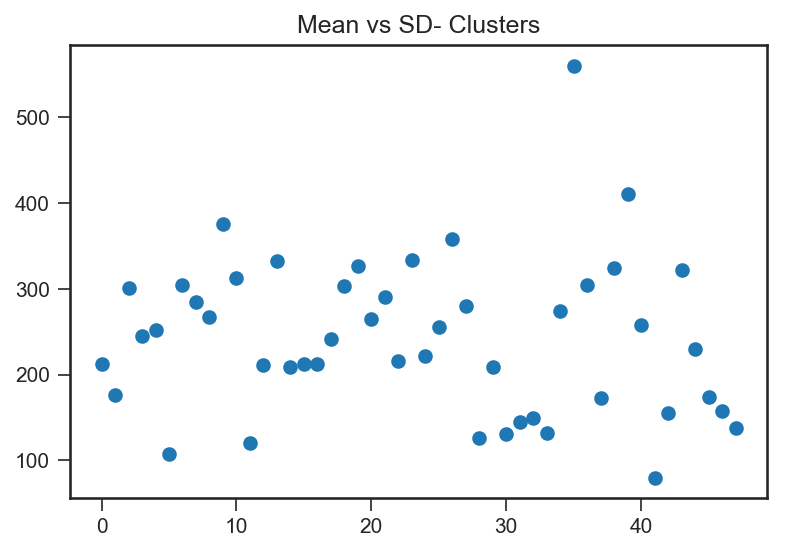

In [98]:
plt.figure(dpi=150);
plt.title('Mean vs SD- Clusters');
plt.scatter(x=mrbles_data['code'].unique(), y=mrbles_data.groupby('code').size());

In [99]:
Dy_means = mrbles_decode.settings.gmm.means[:,0]
Sm_means = mrbles_decode.settings.gmm.means[:,1]
Tm_means = mrbles_decode.settings.gmm.means[:,2]

In [100]:
Dy_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 0, 0]
Sm_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 1, 1]
Tm_cov = mrbles_decode.settings.gmm._gmix.covariances_[:, 2, 2]

In [101]:
Dy_sds = mrbles_decode.settings.gmm.stds[:, 0, 0]
Sm_sds = mrbles_decode.settings.gmm.stds[:, 1, 1]
Tm_sds = mrbles_decode.settings.gmm.stds[:, 2, 2]

In [214]:
Dy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Sm==0))
Sm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm==0))
Tm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm==0))
DyTm_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Tm>0))
DySm_mask = ((mrbles_library_info.Tm==0) & (mrbles_library_info.Sm>0))
SmTm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm>0))
SmDy_mask = ((mrbles_library_info.Tm==0) & (mrbles_library_info.Dy>0))
TmSm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm>0))
TmDy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Dy>0))

Dy_masks_means = np.array([Dy_means[Dy_mask], 
                  Dy_means[DyTm_mask], 
                  Dy_means[DySm_mask]])
Dy_masks_sds = np.array([Dy_sds[Dy_mask], 
                Dy_sds[DyTm_mask], 
                Dy_sds[DySm_mask]])

Sm_masks_means = np.array([Sm_means[Sm_mask], 
                  Sm_means[SmTm_mask], 
                  Sm_means[SmDy_mask]])
Sm_masks_sds = np.array([Sm_sds[Sm_mask], 
                Sm_sds[SmTm_mask], 
                Sm_sds[SmDy_mask]])

Tm_masks_means = np.array([Tm_means[Tm_mask], 
                  Tm_means[TmSm_mask], 
                  Tm_means[TmDy_mask]])
Tm_masks_sds = np.array([Tm_sds[Tm_mask], 
                Tm_sds[TmSm_mask], 
                Tm_sds[TmDy_mask]])

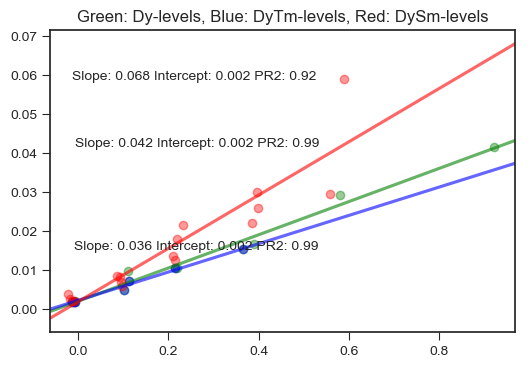

In [206]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Dy-levels, Blue: DyTm-levels, Red: DySm-levels')
n=0
for X1, y1 in zip(Dy_masks_means, Dy_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
plt.savefig('Dy-MeanSD.png',  dpi=300)

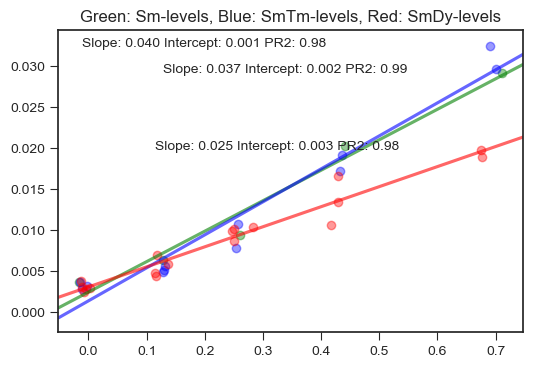

In [218]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Sm-levels, Blue: SmTm-levels, Red: SmDy-levels')
n=0
for X1, y1 in zip(Sm_masks_means, Sm_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
plt.savefig('Sm-MeanSD.png',  dpi=300)

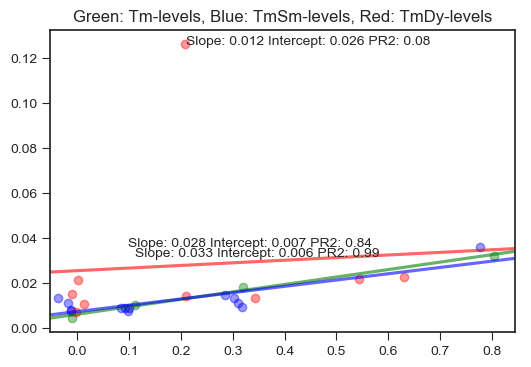

In [217]:
colors = ['green', 'blue', 'red']
fig, ax = plt.subplots(dpi=100);
plt.title('Green: Tm-levels, Blue: TmSm-levels, Red: TmDy-levels')
n=0
for X1, y1 in zip(Tm_masks_means, Tm_masks_sds):
    regr = linear_model.LinearRegression()
    X =X1.reshape(-1,1)
    y = y1.reshape(-1,1)
    regr.fit(X, y)
    slope = regr.coef_[0]
    intercept = regr.intercept_
    r2 = sp.stats.pearsonr(X, y)[0]
    sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                scatter_kws={'alpha':0.4, 'color':colors[n]}, 
                line_kws={'alpha':0.6, 'color':colors[n]});
    plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[1], max(y)));
    n+=1
plt.savefig('Tm-MeanSD.png', dpi=300)

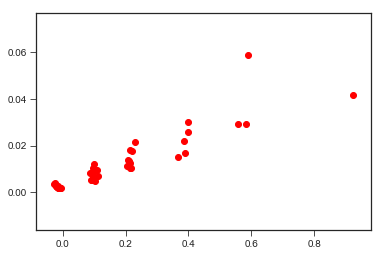

In [102]:
plt.figure()
plt.scatter(x=Dy_means, y=Dy_sds, color='red')

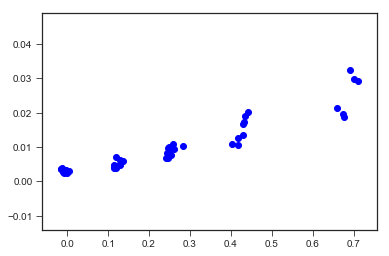

In [103]:
plt.figure()
plt.scatter(x=Sm_means, y=Sm_sds, color='blue')

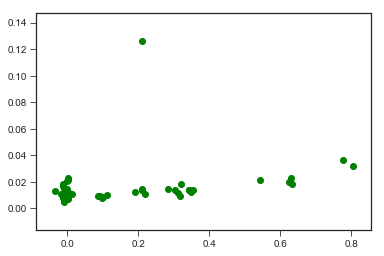

In [104]:
plt.figure()
plt.scatter(x=Tm_means, y=Tm_sds, color='green')

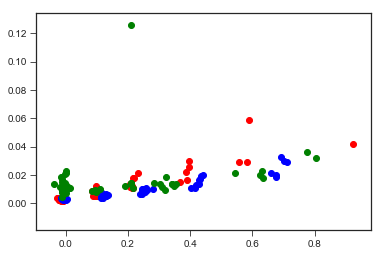

In [105]:
plt.figure()
plt.scatter(x=Dy_means, y=Dy_sds, color='red')
plt.scatter(x=Sm_means, y=Sm_sds, color='blue')
plt.scatter(x=Tm_means, y=Tm_sds, color='green')

In [106]:
Dy_mask = ((mrbles_library_info.Sm==0) & (mrbles_library_info.Sm==0))
Sm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Tm==0))
Tm_mask = ((mrbles_library_info.Dy==0) & (mrbles_library_info.Sm==0))

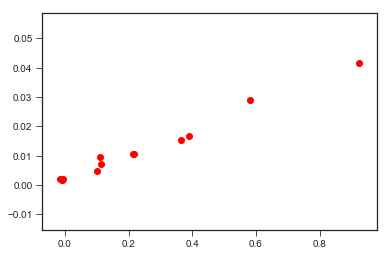

In [107]:
plt.figure()
plt.scatter(x=Dy_means[Dy_mask], y=Dy_sds[Dy_mask], color='red')

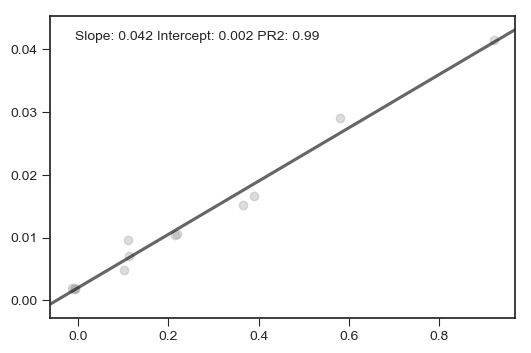

In [166]:
regr = linear_model.LinearRegression()
X = Dy_means[Dy_mask].reshape(-1,1)
y = Dy_sds[Dy_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

fig, ax = plt.subplots(dpi=100);
Dy_mask_plot = sns.regplot(x=X, y=y, ci=None, ax=ax, scatter=True, 
                           scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
                           line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

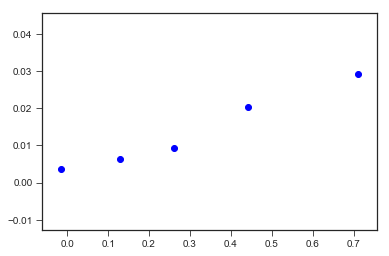

In [117]:
plt.figure()
plt.scatter(x=Sm_means[Sm_mask], y=Sm_sds[Sm_mask], color='blue')

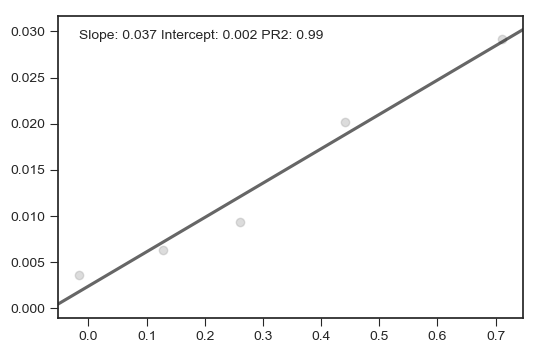

In [165]:
regr = linear_model.LinearRegression()
X = Sm_means[Sm_mask].reshape(-1,1)
y = Sm_sds[Sm_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

fig, ax = plt.subplots(dpi=100)
Sm_mask_plot = sns.regplot(x=X, y=y, ci=None, ax=ax,
              scatter=True, 
              scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
              line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

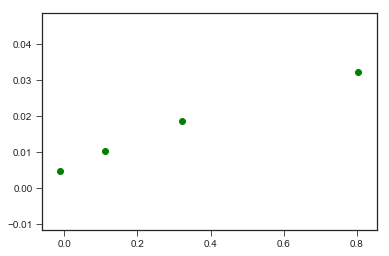

In [119]:
plt.figure()
plt.scatter(x=Tm_means[Tm_mask], y=Tm_sds[Tm_mask], color='green')

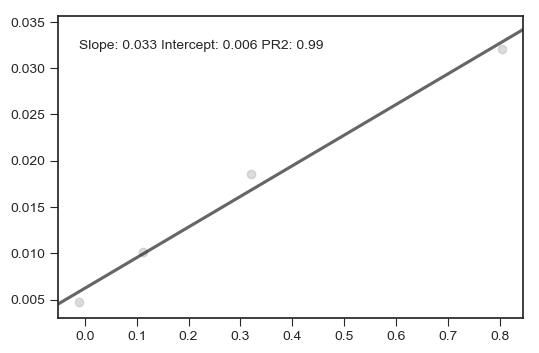

In [167]:
regr = linear_model.LinearRegression()
X = Tm_means[Tm_mask].reshape(-1,1)
y = Tm_sds[Tm_mask].reshape(-1,1)
regr.fit(X, y)
slope = regr.coef_[0]
intercept = regr.intercept_
r2 = sp.stats.pearsonr(X, y)[0]

plt.figure(dpi=100);
Tm_mask_plot = sns.regplot(x=X, y=y, ci=None, 
              scatter=True, 
              scatter_kws={'alpha':0.4, 'color':'darkgray'}, 
              line_kws={'alpha':0.6, 'color':'black'});
plt.annotate('Slope: %0.3f Intercept: %0.3f PR2: %0.2f'%(slope, intercept, r2), xy=(X[0], max(y)));

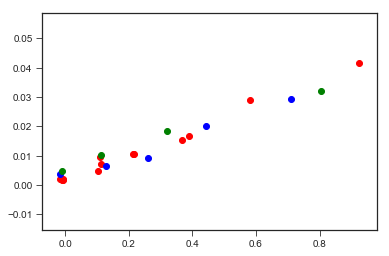

In [121]:
plt.figure()
plt.scatter(x=Dy_means[Dy_mask], y=Dy_sds[Dy_mask], color='red')
plt.scatter(x=Sm_means[Sm_mask], y=Sm_sds[Sm_mask], color='blue')
plt.scatter(x=Tm_means[Tm_mask], y=Tm_sds[Tm_mask], color='green')

In [122]:
DyTm_mask = (mrbles_library_info.Sm==0)
DySm_mask = (mrbles_library_info.Tm==0)
SmTm_mask = (mrbles_library_info.Dy==0)

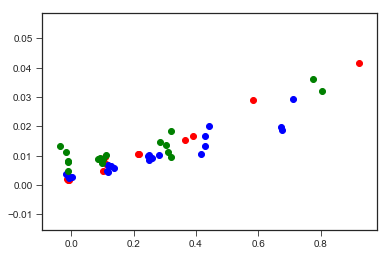

In [123]:
plt.figure()
plt.scatter(x=Dy_means[DyTm_mask], y=Dy_sds[DyTm_mask], color='red')
plt.scatter(x=Sm_means[DySm_mask], y=Sm_sds[DySm_mask], color='blue')
plt.scatter(x=Tm_means[SmTm_mask], y=Tm_sds[SmTm_mask], color='green')

## Analyze per-code data

In [394]:
import importlib
importlib.reload(mrbles)
importlib.reload(mrbles.core)
importlib.reload(mrbles.data)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.8.8
Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.8.8


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

Per-code analysis

In [395]:
mrbles_analyze = mrbles.Analyze(seq_list = mrbles_library_info)

Do your background subtraction here and add column.

In [366]:
mrbles_decode.data.loc[:,'Cy5.mask_ring_min_bkg'] = mrbles_decode.data.loc[:,'Cy5.mask_ring'] - mrbles_decode.data.loc[:,'Cy5.mask_bkg']

Select the data you want to analyze. Always include `['set', 'code', 'flag', 'Cy5.mask_ring']` minimal, or any other assay channel. Also, here you can select the minimum confidence interval as well.

In [377]:
mrbles_decode_data = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ['set','code','flag','Cy5.mask_ring']]

In [378]:
mrbles_decode_data

set  code   flag  Cy5.mask_ring
1       50 nM    32  False         3464.0
2       50 nM    44  False         3039.0
3       50 nM    30  False         2905.0
4       50 nM     5  False         3093.0
5       50 nM    41  False         2614.0
6       50 nM    20  False         2420.5
7       50 nM    41  False         2526.0
8       50 nM    36  False         2367.0
9       50 nM    41  False         2562.0
10      50 nM     5  False         3340.5
11      50 nM    37  False         2559.0
12      50 nM    13  False         3039.5
13      50 nM    31  False         2806.0
14      50 nM    35  False         2814.5
15      50 nM     5  False         3299.0
16      50 nM    17  False         3075.0
17      50 nM    31  False         2903.5
18      50 nM    19  False         3131.5
19      50 nM    44  False         3389.5
20      50 nM    17  False         2943.0
21      50 nM    44  False         2937.0
22      50 nM    30  False         3242.0
23      50 nM     5  False         3005.0
24      50 nM    15  False         2857.5
25      50 nM    34  False         2986.5
26      50 nM     2  False         3249.5
27      50 nM    17  False         3113.0
28      50 nM     5  False         3076.0
29      50 nM    46  False         2964.0
30      50 nM    27  False         3026.0
...       ...   ...    ...            ...
12276  Biotin    10  False         8781.0
12277  Biotin    28  False         6509.0
12278  Biotin    36  False        10250.0
12279  Biotin     6  False        10809.0
12280  Biotin    30  False         7779.0
12281  Biotin    24  False         7855.0
12282  Biotin    21  False        11794.5
12283  Biotin    13  False        10401.0
12284  Biotin     3  False         6590.0
12285  Biotin     9  False         7919.0
12286  Biotin     6  False         7513.0
12287  Biotin     1  False         8902.0
12288  Biotin    42  False         6213.0
12289  Biotin    33  False        10323.0
12290  Biotin    33  False        10696.0
12291  Biotin    26  False        11097.0
12292  Biotin    25  False         6533.0
12294  Biotin    28  False        10400.0
12295  Biotin    21  False        10190.5
12296  Biotin    10  False         7735.0
12297  Biotin     6  False         8515.0
12298  Biotin    32  False         9090.0
12299  Biotin     3  False         6149.0
12300  Biotin     6  False        10903.0
12301  Biotin    17  False         6725.0
12302  Biotin    18  False         5653.0
12303  Biotin    14  False         6237.0
12304  Biotin    22  False         6164.0
12305  Biotin    36  False        11600.0
12306  Biotin    33  False         8771.0

[10984 rows x 4 columns]

In [397]:
mrbles_analyze.analyze(mrbles_decode_data[['set', 'code', 'flag', 'Cy5.mask_ring']])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [380]:
mrbles_analyze.data

CV      N  info.Dy  info.Sm  info.Tm  info.code  \
0   0.542937  229.0        0        0        0          1   
1   0.422928  148.0        0        0  0.08449          2   
2   0.420004  129.0        0        0   0.2896          3   
3   0.279445  107.0        0        0  0.78752          4   
4   0.435818   79.0        0  0.10822        0          5   
5   0.582487  262.0        0  0.10822  0.08449          6   
6   1.139956  301.0        0  0.10822   0.2896          7   
7   1.021870  169.0        0  0.10822  0.78752          8   
8   1.334730  328.0        0   0.2505        0          9   
9   0.433332  141.0        0   0.2505  0.08449         10   
10  0.472115  553.0        0   0.2505   0.2896         11   
11  0.524537  233.0        0  0.43758        0         12   
12  0.467058  314.0        0  0.43758  0.08449         13   
13  0.749589  206.0        0  0.43758   0.2896         14   
14  0.290562  255.0        0  0.68356        0         15   
15  0.398016  284.0        0  0.68356  0.08449         16   
16  0.636306  151.0        0  0.68356   0.2896         17   
17  0.497670  280.0  0.08155        0        0         18   
18  1.180606  123.0  0.08155        0  0.19141         19   
19  0.966993  129.0  0.08155        0  0.65606         20   
20  0.498267  285.0  0.08155  0.10822        0         21   
21  0.466244  314.0  0.08155  0.10822  0.19141         22   
22  0.458018  307.0  0.08155  0.10822  0.65606         23   
23  0.374072  212.0  0.08155   0.2505        0         24   
24  0.453221  320.0  0.08155   0.2505  0.19141         25   
25  0.224472  275.0  0.08155   0.2505  0.65606         26   
26  0.496276  252.0  0.08155  0.43758        0         27   
27  0.767975  238.0  0.08155  0.43758  0.19141         28   
28  0.471482  358.0  0.08155  0.68356        0         29   
29  0.956824  339.0  0.08155  0.68356  0.19141         30   
30  0.953322  298.0  0.20061        0        0         31   
31  0.494478  168.0  0.20061        0  0.34751         32   
32  1.070429  235.0  0.20061  0.10822        0         33   
33  0.610155  132.0  0.20061  0.10822  0.34751         34   
34  0.544173  224.0  0.20061   0.2505        0         35   
35  0.400752  193.0  0.20061   0.2505  0.34751         36   
36  0.557191  384.0  0.20061  0.43758        0         37   
37  0.238711  190.0  0.20061  0.43758  0.34751         38   
38  0.411456  272.0  0.20061  0.68356        0         39   
39  0.681369  115.0  0.37445        0        0         40   
40  0.591291  203.0  0.37445        0  0.57542         41   
41  0.694522  207.0  0.37445  0.10822        0         42   
42  0.289988  271.0  0.37445   0.2505        0         43   
43  0.438442  122.0  0.37445  0.43758        0         44   
44  0.716074  240.0  0.62826        0        0         45   
45  0.359440  184.0  0.62826  0.10822        0         46   
46  0.352141  133.0  0.62826   0.2505        0         47   
47  0.168278   92.0  0.99882        0        0         48   

                          info.info info.repeat     info.sequence  \
0                                WT          1A   AGPHPVIVITGPHEE   
1                         Scrambled          2A   AGIVPIHVTHAPGEE   
2                                Li          3A   AGPHPVIVVTGPHEE   
3                                Li          4A   AGPHPVIVINGPHEE   
4                                Li          5A   AGPHPVIAVTGPHEE   
5                                Li          6A   AGPHPAIVITGPHEE   
6                                Li          6B   AGPHPAIVITGPHEE   
7   High binder from initial assays          7A   AGPHPKIVITGPHEE   
8   High binder from initial assays          8A   AGPHPSIVITGPHEE   
9       Benchmark for phosphoserine          9A   AGPHPVIAVTGPSEE   
10                    Phosphoserine         10A   AGPHPVIAVTGPsEE   
11                               WT          1B   AGPHPVIVITGPHEE   
12                              NaN          2B   AGIVPIHVTHAPGEE   
13                              NaN          3B   AGPH

## Bead Sampling

In [306]:
def balance_data(data, sample_method, channel):
    #data = data_set.loc[set_key, [channel, 'code', 'seq']]
    data[channel].dropna(inplace=True)
    codes = np.unique(data.code)
    #codes = codes[~np.isnan(codes)]
    print("Codes: ", codes)
    data_grouped = data.groupby('code')
    min_codes = data_grouped.size().min()
    max_codes = data_grouped.size().max()
    print("Min codes:", min_codes, "\nMax codes:", max_codes)
    median_codes = data_grouped.size().median()
    mean_codes = data_grouped.size().mean()
    std_codes = data_grouped.size().std()
    print("Median codes:", int(median_codes), "\nMean codes:", int(mean_codes), "\nSD codes:", int(std_codes))
    data_grouped.size().plot(kind='kde', title="Bead number per-code")
    if sample_method == 'up':
        data_sampled = data_grouped.apply(lambda x: x.sample(max_codes, replace=True))
    elif sample_method == 'down':
        data_sampled = data_grouped.apply(lambda x: x.sample(min_codes))
    elif sample_method == 'down-random':
        rus = RandomUnderSampler(return_indices=True)
        X_rus, y_rus, id_rus = rus.fit_sample(data[channel].values.reshape(-1, 1), data.code.values.reshape(-1, 1))
        X_rus2, y_rus2, id_rus2 = rus.fit_sample(data[channel].values.reshape(-1, 1), data['info.sequence'].values.reshape(-1, 1))
        print('Removed indexes:', id_rus)
        data_array = np.array([X_rus[:,0], y_rus, y_rus2]).T
        data_sampled = pd.DataFrame(data_array, columns=[channel, 'code', 'info.sequence'])
    elif sample_method == 'up-random':
        ros = RandomOverSampler()
        X_ros, y_ros = ros.fit_sample(data[channel].values.reshape(-1, 1), data.code.values.reshape(-1, 1))
        #X_ros2, y_ros2 = ros.fit_sample(data[channel].values.reshape(-1, 1), data['info.sequence'].values.reshape(-1, 1))
        print('New random picked points:', X_ros.shape[0] - data[channel].shape[0])
        #data_array = np.array([X_ros[:,0], y_ros, y_ros2]).T
        data_array = np.array([X_ros[:,0], y_ros]).T
        #print(data_array.shape)
        #print(X_ros[:,0].shape)
        #print(y_ros.shape)
        #print(y_ros2.shape)
        #data_array = [X_ros[:,0], y_ros, y_ros2]
        #data_sampled = pd.DataFrame(data_array, columns=[channel, 'code', 'info.sequence'])
        data_sampled = pd.DataFrame(data_array, columns=[channel, 'code'])
    return data_sampled.reset_index(drop=True)

In [310]:
def step_sample(data, channel='Cy5_min_bkg', num_start=2, num_step=2, x_step=None, confidence=0.95):
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    codes = np.unique(data.code)
    #codes = codes[~np.isnan(codes)]
    data_grouped = data.groupby('code')
    max_per_code = data_grouped.size().max()
    sample_steps = []
    data_step_sampled_df = []
    data_step_sampled_df_all = []
    while num_start <= max_per_code:
        sample_steps.append(num_start)
        data_sampled = data_grouped.apply(lambda x: x.sample(num_start))
        data_step_sampled_df_all.append(data_sampled)
        data_step_sampled = {}
        #data_step_sampled['sequence'] = data_sampled.loc[:, 'info.sequence'].astype(str).groupby('code').first()
        #print(data_step_sampled['sequence'])
        data_step_sampled['mean'] = data_sampled.loc[:, channel].astype(float).groupby('code').mean()
        data_step_sampled['median'] = data_sampled.loc[:, channel].astype(float).groupby('code').median()
        data_step_sampled['SD'] = data_sampled.loc[:, channel].astype(float).groupby('code').std()
        data_step_sampled['SE'] = data_step_sampled['SD'] / np.sqrt(num_start)
        data_step_sampled['SE_median_up'] = data_step_sampled['median'] - data_step_sampled['SE']
        data_step_sampled['SE_median_down'] = data_step_sampled['median'] + data_step_sampled['SE']
        ci_value = data_step_sampled['SE'] * sp.stats.t._ppf((1+confidence)/2., num_start-1)
        data_step_sampled['CI'] = ci_value
        data_step_sampled['CI_mean_up'] = data_step_sampled['mean'] + ci_value
        data_step_sampled['CI_mean_down'] = data_step_sampled['mean'] - ci_value
        data_step_sampled['CI_median_up'] = data_step_sampled['median'] + ci_value
        data_step_sampled['CI_median_down'] = data_step_sampled['median'] - ci_value
        data_step_sampled_df.append(pd.DataFrame.from_dict(data_step_sampled))
        if x_step is None:
            num_start += num_step
        else:
            num_start *= x_step
    final_data = pd.concat(data_step_sampled_df, keys=sample_steps)
    final_data.index.set_names(['sample_size', 'code'], inplace=True)
    final_data_all = pd.concat(data_step_sampled_df_all, keys=sample_steps)
    final_data_all.drop('code', axis=1, inplace=True)
    final_data_all.index.set_names(['sample_size', 'code', 'id'], inplace=True)
    return final_data.reset_index(), final_data_all.reset_index()

In [248]:
mrbles_data[((mrbles_data.confidence > 0.95) & (mrbles_data['Cy5_min_bkg'] > 0))].loc[mrbles_data.set=='1000 nM', ['code', 'info.sequence', 'Cy5_min_bkg']]

code     info.sequence  Cy5_min_bkg
9264     13   AGPHPVIVVTGPHEE       1281.5
9265     42  KRMEPIAIIITDTEIS        191.0
9270     29   AGPHPKIVITGPHEE       7697.0
9271     19   AGPHPSIVITGPHEE       1482.0
9272     27   AGPHPAIVITGPHEE       1926.5
9282     32   AGPHPAIVITGPHEE       1663.0
9286      0   AGPHPVIVITGPHEE       2930.5
9291     17   AGPHPAIVITGPHEE       3207.0
9298     37  KRMEPIAIIITDTEIS        492.0
9302     24   AGPHPVIVVTGPHEE       1330.0
9303     44  ASGLSPRIEITPSHEL         67.0
9304     30   AGPHPSIVITGPHEE       5108.0
9305     34  ASGLSPRIEITPSHEL        878.5
9307     32   AGPHPAIVITGPHEE       3930.0
9309     37  KRMEPIAIIITDTEIS        316.0
9310      7   AGPHPKIVITGPHEE      16547.5
9311      5   AGPHPAIVITGPHEE      11107.5
9313     32   AGPHPAIVITGPHEE       1699.5
9314     24   AGPHPVIVVTGPHEE       4490.5
9316     24   AGPHPVIVVTGPHEE       3635.0
9320     22   AGPHPVIVITGPHEE       2219.5
9321     28   AGPHPVIAVTGPsEE         90.0
9324     30   AGPHPSIVITGPHEE       2604.0
9325      0   AGPHPVIVITGPHEE       2378.5
9329     17   AGPHPAIVITGPHEE       2248.0
9330      7   AGPHPKIVITGPHEE       8888.5
9332      6   AGPHPAIVITGPHEE       3581.0
9333     42  KRMEPIAIIITDTEIS        235.0
9334     33  PALESPRIEITSCLGL         94.0
9336     33  PALESPRIEITSCLGL        431.5
...     ...               ...          ...
10983     8   AGPHPSIVITGPHEE       5686.5
10985     2   AGPHPVIVVTGPHEE       1343.0
10987     8   AGPHPSIVITGPHEE       1017.0
10988     8   AGPHPSIVITGPHEE       5053.0
10989    11   AGPHPVIVITGPHEE       2592.5
10992    10   AGPHPVIAVTGPsEE          2.0
10993    35  ASGLSPRIEITGSHEL         40.5
10997    47  KRMEPIAIIITDTEIS        311.0
10998     5   AGPHPAIVITGPHEE       2913.0
11001     6   AGPHPAIVITGPHEE       1699.0
11003    29   AGPHPKIVITGPHEE      14854.5
11004    28   AGPHPVIAVTGPsEE        139.5
11006    34  ASGLSPRIEITPSHEL         11.5
11007    22   AGPHPVIVITGPHEE       4554.5
11011    34  ASGLSPRIEITPSHEL        743.5
11012    22   AGPHPVIVITGPHEE       3844.0
11013    40  ASGLSPRIEITGSHEL       1026.0
11016    24   AGPHPVIVVTGPHEE       5896.0
11017    24   AGPHPVIVVTGPHEE       3631.0
11018    29   AGPHPKIVITGPHEE      17585.5
11021    30   AGPHPSIVITGPHEE       8669.5
11022    29   AGPHPKIVITGPHEE       7900.0
11023    18   AGPHPKIVITGPHEE      23734.5
11024    44  ASGLSPRIEITPSHEL       3539.0
11026    33  PALESPRIEITSCLGL         49.5
11028     8   AGPHPSIVITGPHEE       3603.0
11029    24   AGPHPVIVVTGPHEE       2849.0
11032     8   AGPHPSIVITGPHEE       1488.0
11038    29   AGPHPKIVITGPHEE      26564.0
11039    34  ASGLSPRIEITPSHEL        117.0

[951 rows x 3 columns]

Codes:  [ 0  2  5  6  7  8 10 11 13 16 17 18 19 21 22 24 27 28 29 30 32 33 34 35
 37 38 39 40 42 43 44 45 47]
Min codes: 1 
Max codes: 61
Median codes: 30 
Mean codes: 28 
SD codes: 16
New random picked points: 1062


c:\users\bjorn\.virtualenvs\bead_analysis-zay6vl3a\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



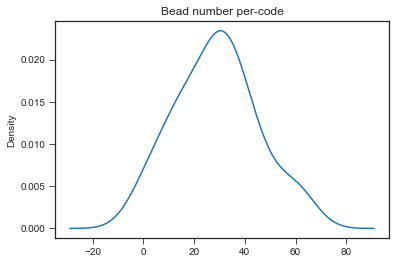

In [307]:
data_sampled = balance_data(mrbles_data[((mrbles_data.confidence > 0.95) & (mrbles_data['Cy5_min_bkg'] > 0))].loc[mrbles_data.set=='1000 nM', ['code', 'info.sequence', 'Cy5_min_bkg']], 'up-random', channel = 'Cy5_min_bkg')

In [263]:
data_sampled

Cy5_min_bkg code
0         1281.5   13
1            191   42
2           7697   29
3           1482   19
4         1926.5   27
5           1663   32
6         2930.5    0
7           3207   17
8            492   37
9           1330   24
10            67   44
11          5108   30
12         878.5   34
13          3930   32
14           316   37
15       16547.5    7
16       11107.5    5
17        1699.5   32
18        4490.5   24
19          3635   24
20        2219.5   22
21            90   28
22          2604   30
23        2378.5    0
24          2248   17
25        8888.5    7
26          3581    6
27           235   42
28            94   33
29         431.5   33
...          ...  ...
1983        40.5   35
1984        40.5   35
1985        40.5   35
1986        40.5   35
1987        40.5   35
1988        40.5   35
1989        40.5   35
1990        40.5   35
1991        40.5   35
1992        40.5   35
1993        40.5   35
1994        40.5   35
1995        40.5   35
1996        40.5   35
1997        40.5   35
1998        40.5   35
1999        40.5   35
2000        40.5   35
2001        40.5   35
2002        40.5   35
2003        40.5   35
2004        40.5   35
2005        40.5   35
2006        40.5   35
2007        40.5   35
2008        40.5   35
2009        40.5   35
2010        40.5   35
2011        40.5   35
2012        40.5   35

[2013 rows x 2 columns]

In [311]:
data_per_step, data_per_step_all = step_sample(data_sampled, num_start=2, x_step=2, channel='Cy5_min_bkg')

In [103]:
sequences

code         sequence       Dy       Sm       Tm repeat  \
0      1  KETAAAKFERQHMDS  0.00000  0.00000  0.00000     1A   
1      2  RDEFMAAKTAQSEKH  0.00000  0.00000  0.08449     2A   
2      3  KETAAAKFERQHIDS  0.00000  0.00000  0.28960     3A   
3      4  KETAAAKFERQHVDS  0.00000  0.00000  0.78752     4A   
4      5  KETAAAKFERQHLDS  0.00000  0.10822  0.00000     5A   
5      6  KETAAAKFERQHFDS  0.00000  0.10822  0.08449     6A   
6      7  KETAAAKFERQHADS  0.00000  0.10822  0.28960     7A   
7      8                G  0.00000  0.10822  0.78752     8A   
8      9  KETAAAKFERQHMDS  0.00000  0.25050  0.00000     1B   
9     10  RDEFMAAKTAQSEKH  0.00000  0.25050  0.08449     2B   
10    11  KETAAAKFERQHIDS  0.00000  0.25050  0.28960     3B   
11    12  KETAAAKFERQHVDS  0.00000  0.43758  0.00000     4B   
12    13  KETAAAKFERQHLDS  0.00000  0.43758  0.08449     5B   
13    14  KETAAAKFERQHFDS  0.00000  0.43758  0.28960     6B   
14    15  KETAAAKFERQHADS  0.00000  0.68356  0.00000     7B   
15    16                G  0.00000  0.68356  0.08449     8B   
16    17  KETAAAKFERQHMDS  0.00000  0.68356  0.28960     1C   
17    18  RDEFMAAKTAQSEKH  0.08155  0.00000  0.00000     2C   
18    19  KETAAAKFERQHIDS  0.08155  0.00000  0.19141     3C   
19    20  KETAAAKFERQHVDS  0.08155  0.00000  0.65606     4C   
20    21  KETAAAKFERQHLDS  0.08155  0.10822  0.00000     5C   
21    22  KETAAAKFERQHFDS  0.08155  0.10822  0.19141     6C   
22    23  KETAAAKFERQHADS  0.08155  0.10822  0.65606     7C   
23    24                G  0.08155  0.25050  0.00000     8C   
24    25           YNFEVL  0.08155  0.25050  0.19141     9A   
25    26           ELVNYF  0.08155  0.25050  0.65606    10A   
26    27           YNFEVT  0.08155  0.43758  0.00000    11A   
27    28           FNFELL  0.08155  0.43758  0.19141    12A   
28    29           VNFEVV  0.08155  0.68356  0.00000    13A   
29    30           YNFVIV  0.08155  0.68356  0.19141    14A   
30    31           FNFEVL  0.20061  0.00000  0.00000    15A   
31    32           FNFEVV  0.20061  0.00000  0.34751    16A   
32    33           YNFEVL  0.20061  0.10822  0.00000     9B   
33    34           ELVNYF  0.20061  0.10822  0.34751    10B   
34    35           YNFEVT  0.20061  0.25050  0.00000    11B   
35    36           FNFELL  0.20061  0.25050  0.34751    12B   
36    37           VNFEVV  0.20061  0.43758  0.00000    13B   
37    38           YNFVIV  0.20061  0.43758  0.34751    14B   
38    39           FNFEVL  0.20061  0.68356  0.00000    15B   
39    40           FNFEVV  0.37445  0.00000  0.00000    16B   
40    41           YNFEVL  0.37445  0.00000  0.57542     9C   
41    42           ELVNYF  0.37445  0.10822  0.00000    10C   
42    43           YNFEVT  0.37445  0.25050  0.00000    11C   
43    44           FNFELL  0.37445  0.43758  0.00000    12C   
44    45           VNFEVV  0.62826  0.00000  0.00000    13C   
45    46           YNFVIV  0.62826  0.10822  0.00000    14C   
46    47           FNFEVL  0.62826  0.25050  0.00000    15C   
47    48           FNFEVV  0.99882  0.00000  0.00000    16C   

                        info         kd  
0                      S-Tag     110 nM  
1           S-Tag - Scramble        NaN  
2              S-Tag mutants     150 nM  
3              S-Tag mutants     180 nM  
4              S-Tag mutants     300 nM  
5              S-Tag mutants   10000 nM  
6              S-Tag mutants  110000 nM  
7                    G-Blank        NaN  
8                      S-Tag     110 nM  
9           S-Tag - Scramble        NaN  
10             S-Tag mutants     150 nM  
11             S-Tag mutants     180 nM  
12             S-Tag mutants     300 nM  
13             S-Tag mutants   10000 nM  
14             S-Tag mutants  110000 nM  
15                   G-Blank        NaN  
16                     S-Tag     110 nM  
17          S-Tag - Scramble        NaN  
18             S-Tag mutants     150 nM  
19             S-Tag mutants     180 nM  
20             S-Tag mutants     3

In [312]:
data_per_step_all

sample_size  code    id  Cy5_min_bkg
0               2   0.0  1131       2678.0
1               2   0.0  1154       1260.5
2               2   2.0  1453       1673.0
3               2   2.0  1447       3422.5
4               2   5.0   226       1664.5
5               2   5.0  1310       1866.0
6               2   6.0   357       6850.0
7               2   6.0   161      19577.0
8               2   7.0   748      28452.0
9               2   7.0  1279       7400.0
10              2   8.0   523       2184.0
11              2   8.0   287       2734.0
12              2  10.0  1494        168.0
13              2  10.0  1491         91.5
14              2  11.0  1761       3595.0
15              2  11.0   515       4491.5
16              2  13.0   956       3575.0
17              2  13.0   870        179.5
18              2  16.0  1549       1951.0
19              2  16.0  1543       6469.0
20              2  17.0  1161       2533.0
21              2  17.0   498       1066.0
22              2  18.0   147      22277.0
23              2  18.0   472       9948.5
24              2  19.0  1021       2806.0
25              2  19.0   666       3181.0
26              2  21.0   852        788.0
27              2  21.0  1517        178.0
28              2  22.0   258       2308.5
29              2  22.0   378        904.0
...           ...   ...   ...          ...
2016           32  47.0  1789        456.0
2017           32  47.0   736        493.5
2018           32  47.0  1829         43.0
2019           32  47.0  1794        493.5
2020           32  47.0  1833        214.0
2021           32  47.0   546         14.0
2022           32  47.0  1798         43.5
2023           32  47.0   911        816.0
2024           32  47.0  1799        172.5
2025           32  47.0  1825        311.0
2026           32  47.0   204        374.0
2027           32  47.0  1830         14.0
2028           32  47.0  1826        633.5
2029           32  47.0  1831        816.0
2030           32  47.0  1793        456.0
2031           32  47.0   150        214.0
2032           32  47.0   460        172.5
2033           32  47.0  1820        374.0
2034           32  47.0  1807        456.0
2035           32  47.0  1810        493.5
2036           32  47.0  1814         14.0
2037           32  47.0  1818        311.0
2038           32  47.0  1822        289.0
2039           32  47.0   535        456.0
2040           32  47.0  1804        456.0
2041           32  47.0  1806        456.0
2042           32  47.0  1788        456.0
2043           32  47.0  1817        374.0
2044           32  47.0  1801         43.0
2045           32  47.0  1800        172.5

[2046 rows x 4 columns]

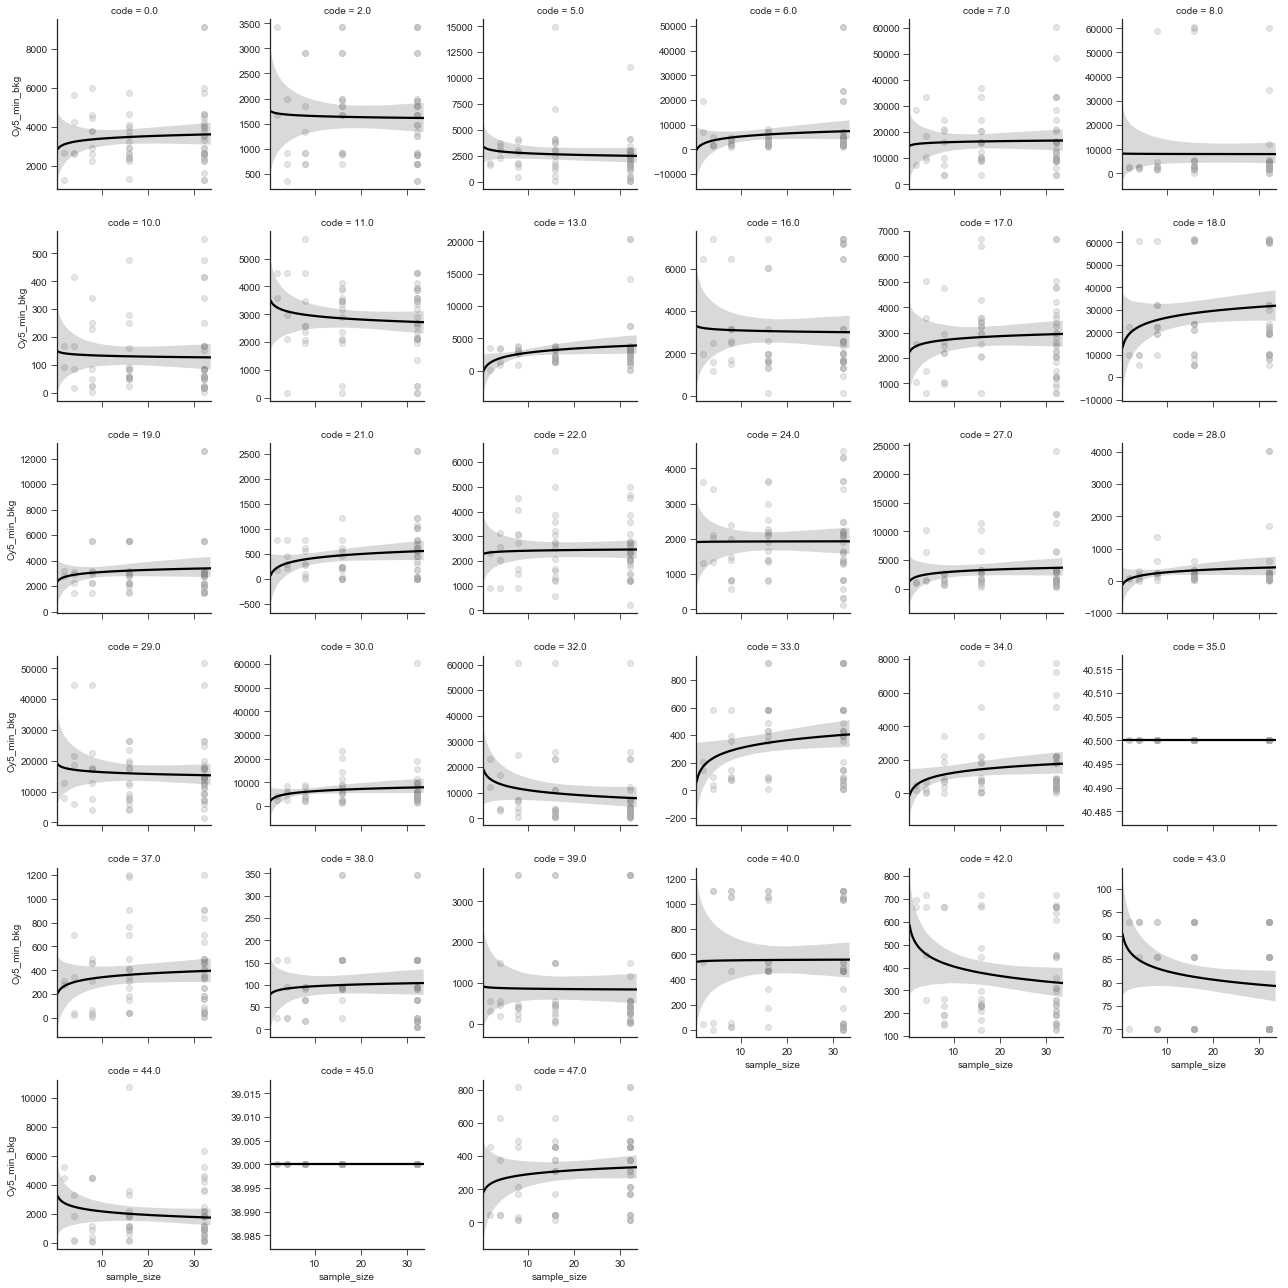

In [318]:
#g = sns.FacetGrid(data_per_step_all, col="code", col_wrap=4, sharey=False, xlim=(0,128))
g = sns.FacetGrid(data_per_step_all.sort_values('code'), col="code", col_wrap=6, sharey=False)

g.map(sns.regplot, 'sample_size', 'Cy5_min_bkg', data=data_per_step_all, 
      logx=True, ci=95, n_boot=5000, 
      scatter=True, scatter_kws={'alpha':0.3, 'color':'darkgray'}, line_kws={'color':'black'})

In [319]:
g.savefig('beads-per-code-stability - No-ShareY.png')